# Clase 5 - Ejercicio 1
<br/>

## Curso de Especialización en Inteligencia Artificial
## Introducción a la inteligencia artificial
<br/>

### Autor: Maximiliano Torti
### Fecha: 31/05/21
<br/>

#### Enunciado:<br/>
1. Generar un dataset sintético con una función seno (pueden usar otras funciones no lineales)
2. Hacer el gráfico de los datos
3. Hacer fit con la solución cerrada de regresión lineal y con los algoritmos de descenso por el gradiente vistos en clase, para diferentes polinomios hasta el orden 15. Comenten los problemas numéricos encontrados.
4. Obtener mediante cross-validation para cada polinomio el error de validación.
5. Seleccionar el modelo con complejidad correcta para el dataset.
6. Regularizar el modelo y comparar los resultados.

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20


## Punto 1

In [2]:
# Generamos el dataset sintetico mediante funcion seno
x = np.linspace(0,2,200) * np.pi
y = np.sin(x) + np.random.normal(0,0.2,x.shape[0])

## Punto 2

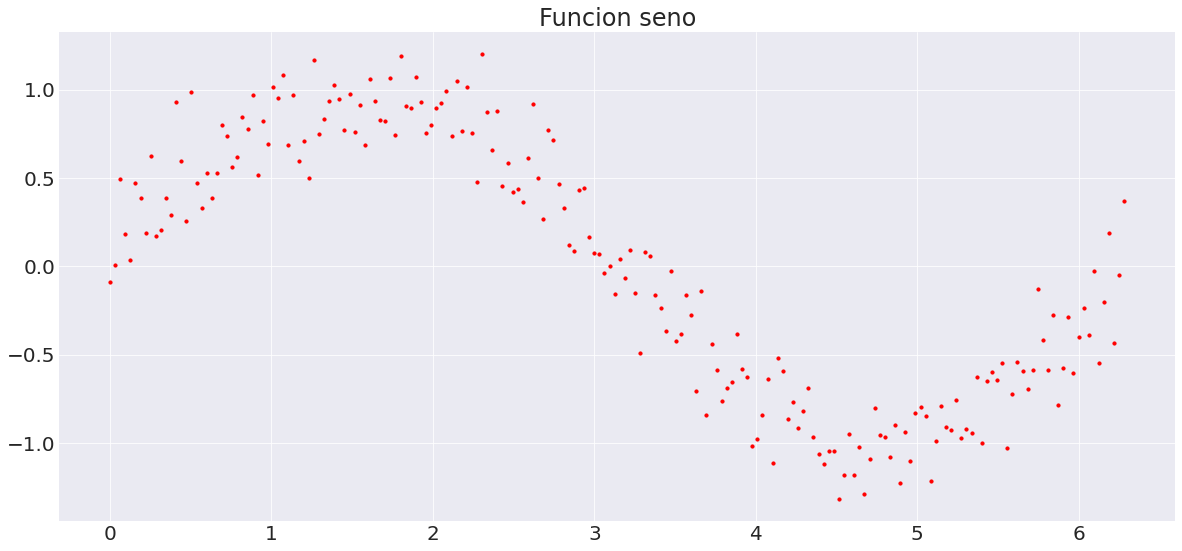

In [3]:
# Plot del dataset
plt.figure()
plt.scatter(x,y,s=10, color='red')
plt.title('Funcion seno');


## Punto 3

In [4]:
# Creamos función para obtener el fit para regresión lineal afín
class AffineLinearRegression:
    """
    Modelo de aproximación con regresión afín a la lineal
    """
    _W=None
    
    def __init__(self):
        pass
    
    def fit(self, x, y):
        """
        Función de ajuste de W
        
        Args:
            x (numpy array): array de valores de entrada
            y (numpy array): array de valores de salida

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=y[:,np.newaxis]
        self._W= np.linalg.inv(np.transpose(x)@x)@np.transpose(x)@y

        return
    
    def predict(self,x):
        """
        Función de predicción
        
        Args:
            x (numpy array): array de valores de entrada
            
        Returns
            numpy array: array de predicciones

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=np.transpose(self._W)@np.transpose(x)
        return y[0,:]

In [5]:
# Antes de realizar los entrenamientos, dividimos el dataset entre entrenamiento y testeo
perm_idx=np.random.permutation(x.shape[0])
x_train=x[perm_idx[:round(x.shape[0]*0.8)]]
y_train=y[perm_idx[:round(y.shape[0]*0.8)]]
x_test=x[perm_idx[round(x.shape[0]*0.8):]]
y_test=y[perm_idx[round(y.shape[0]*0.8):]]

In [6]:
# Creamos función para extender el polinomio a diferentes grados
def create_poly(x, n):
    x_aux = x.copy()
    if len(x_aux.shape)<2:
        x_aux=x_aux[:,np.newaxis]
    if(n>1):
        for i in range(2,n+1):
            x_aux = np.concatenate((x_aux,x[:,np.newaxis]**i),axis=1)
    return x_aux

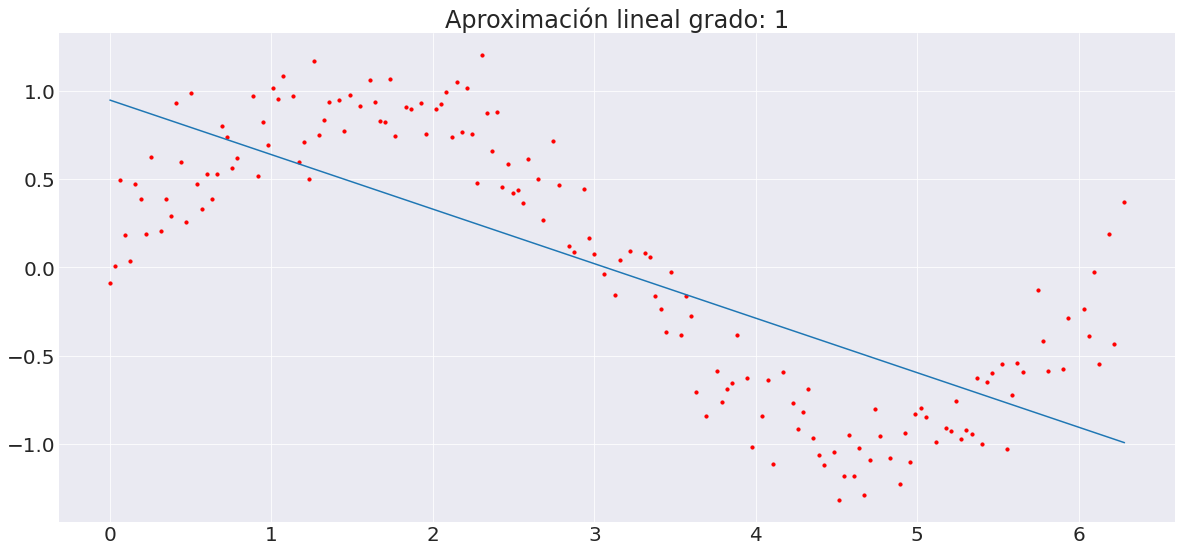

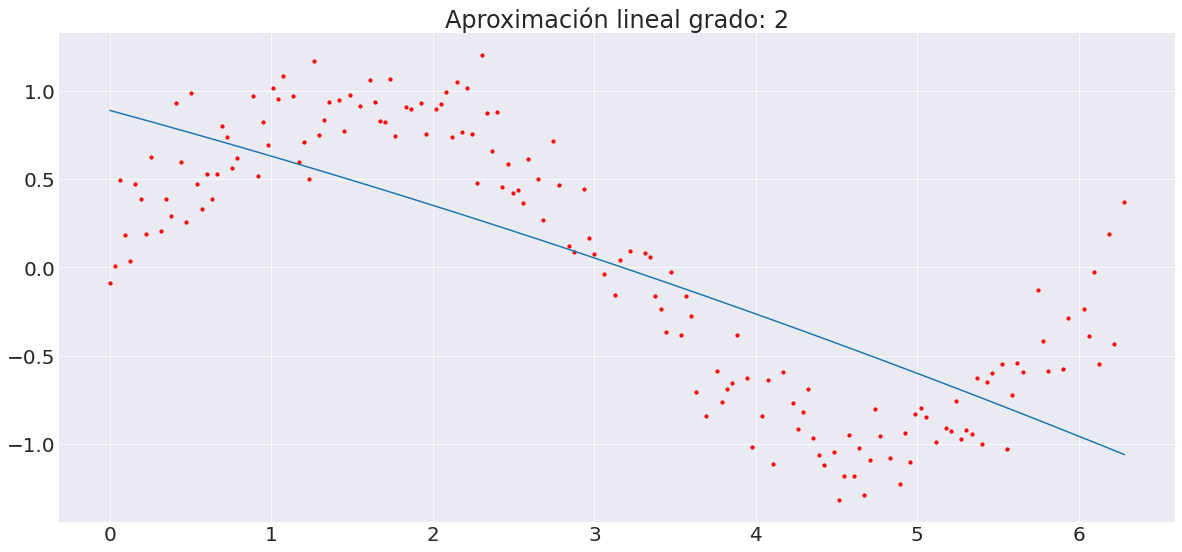

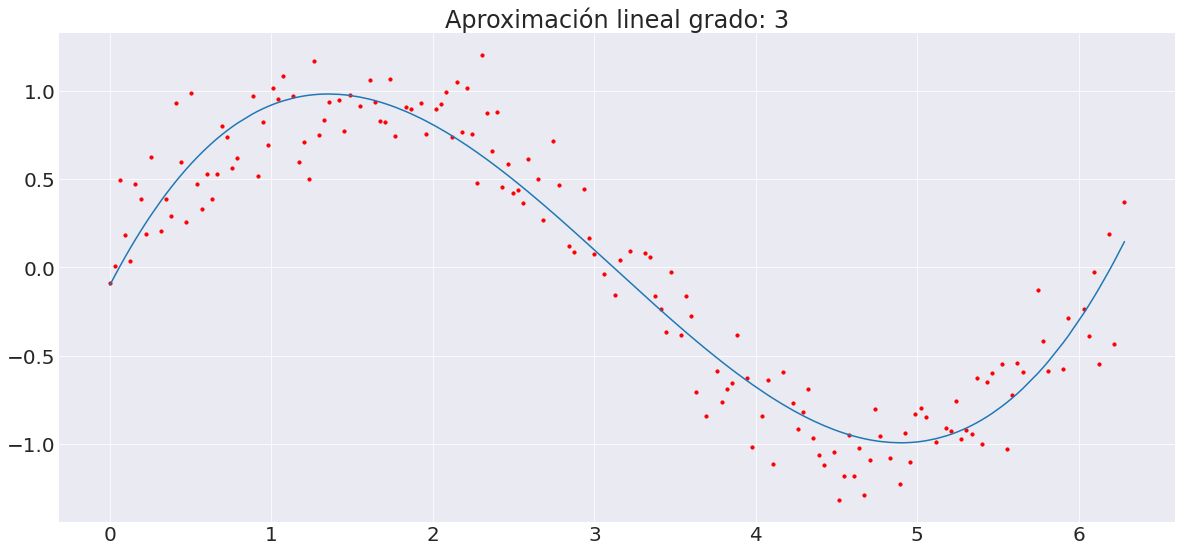

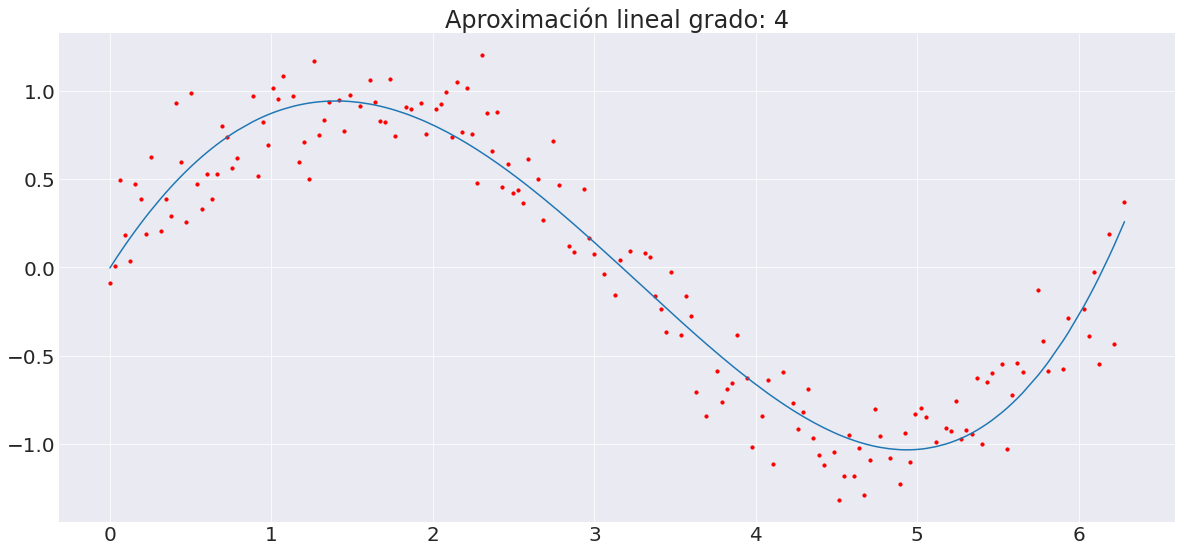

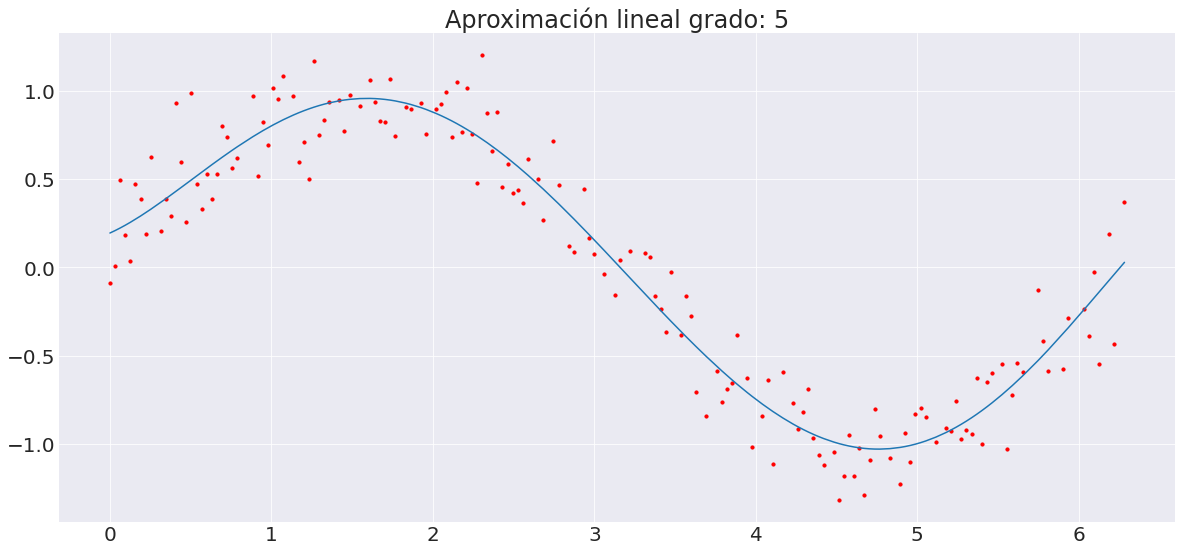

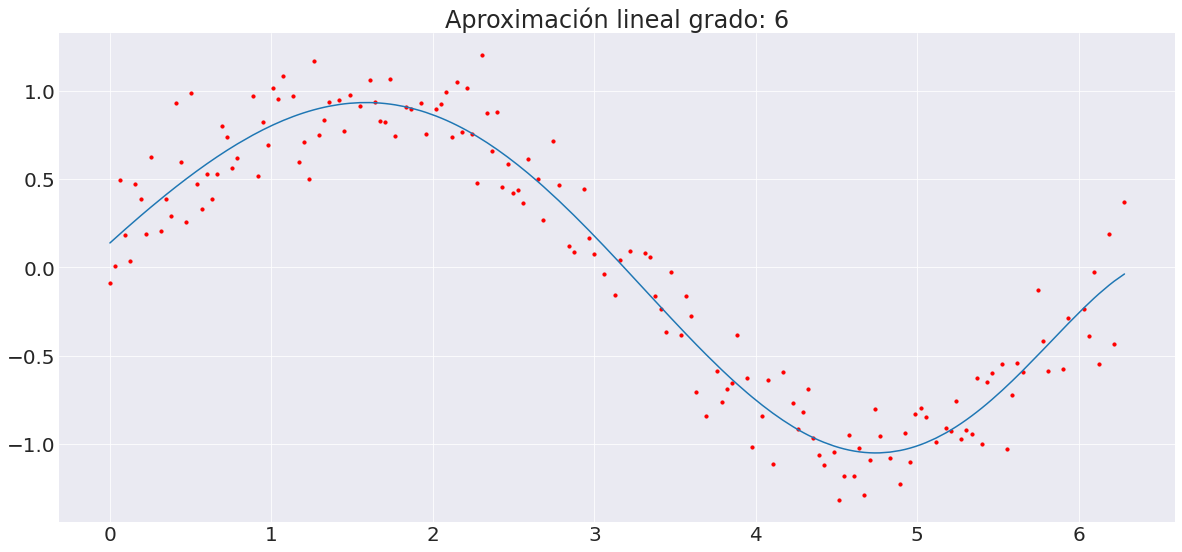

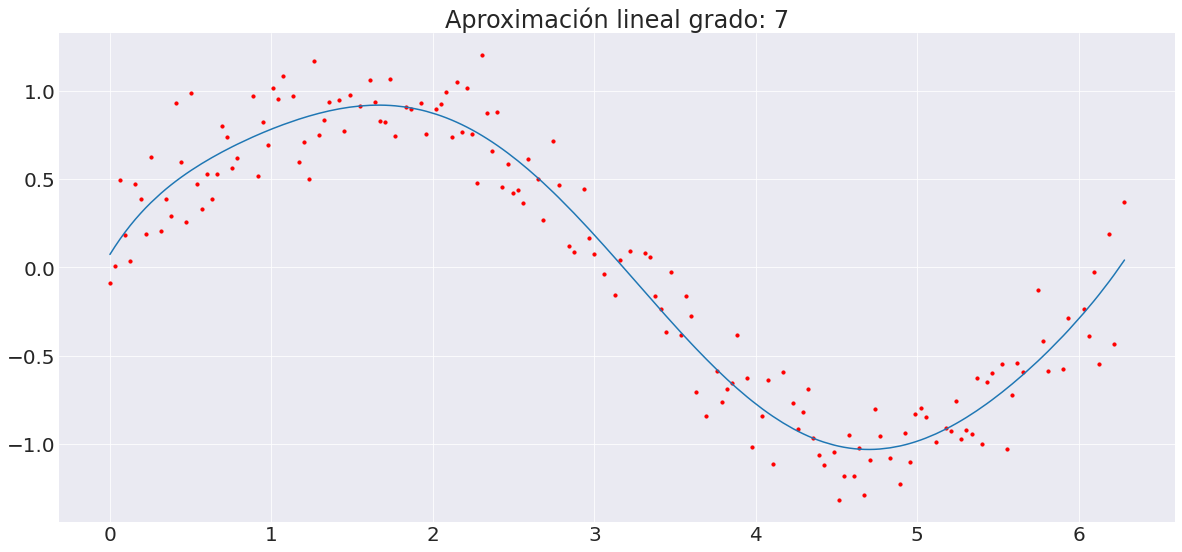

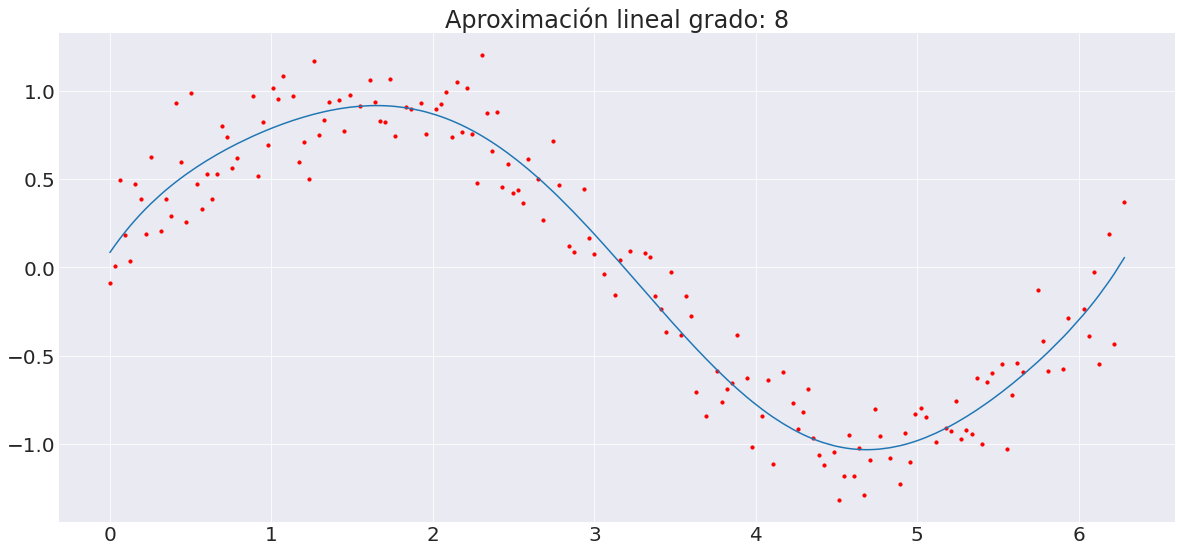

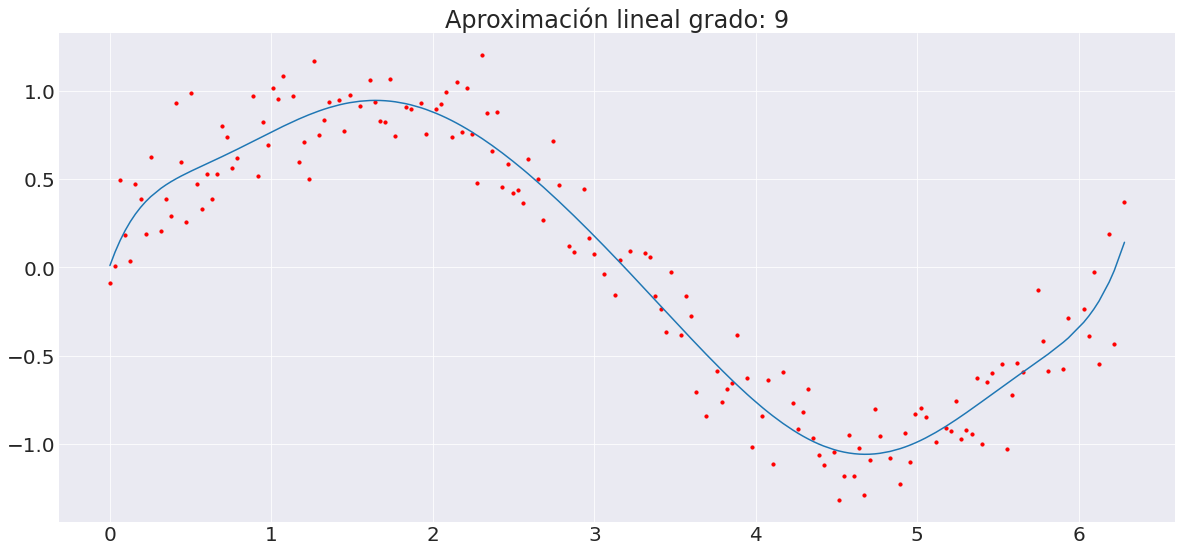

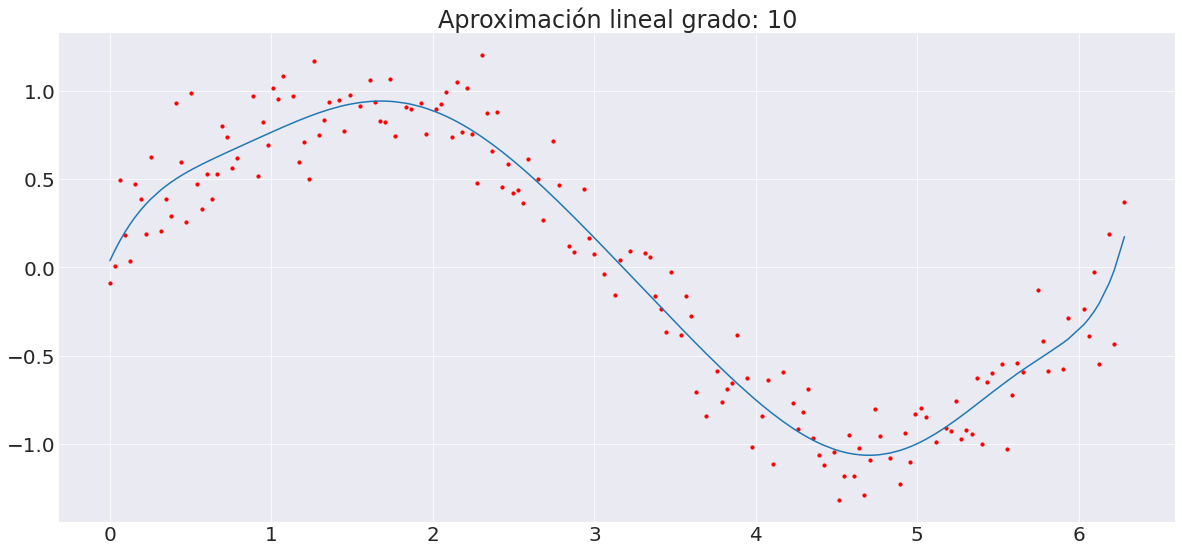

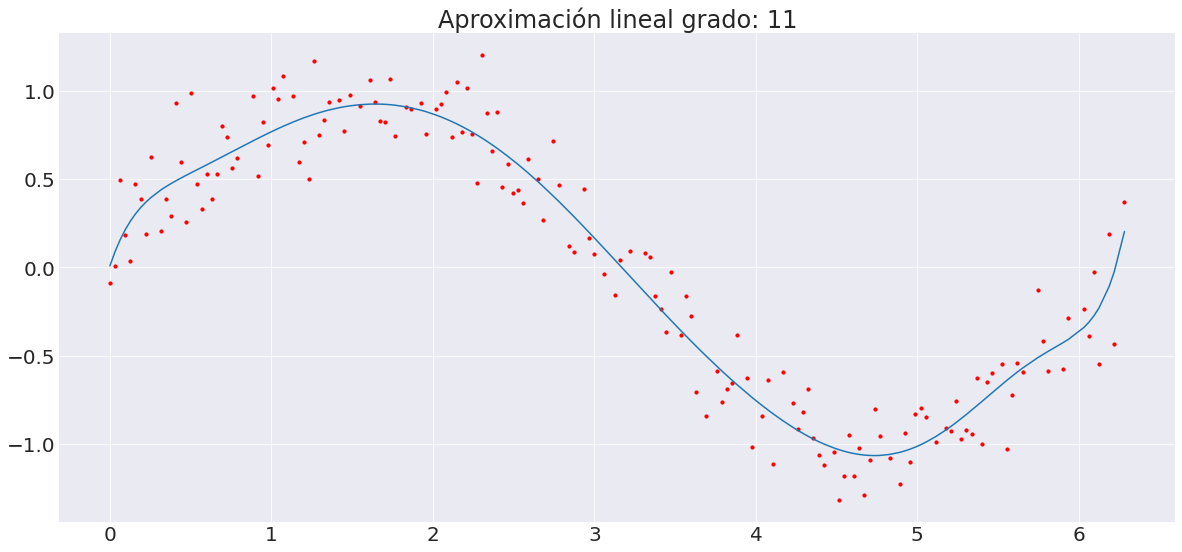

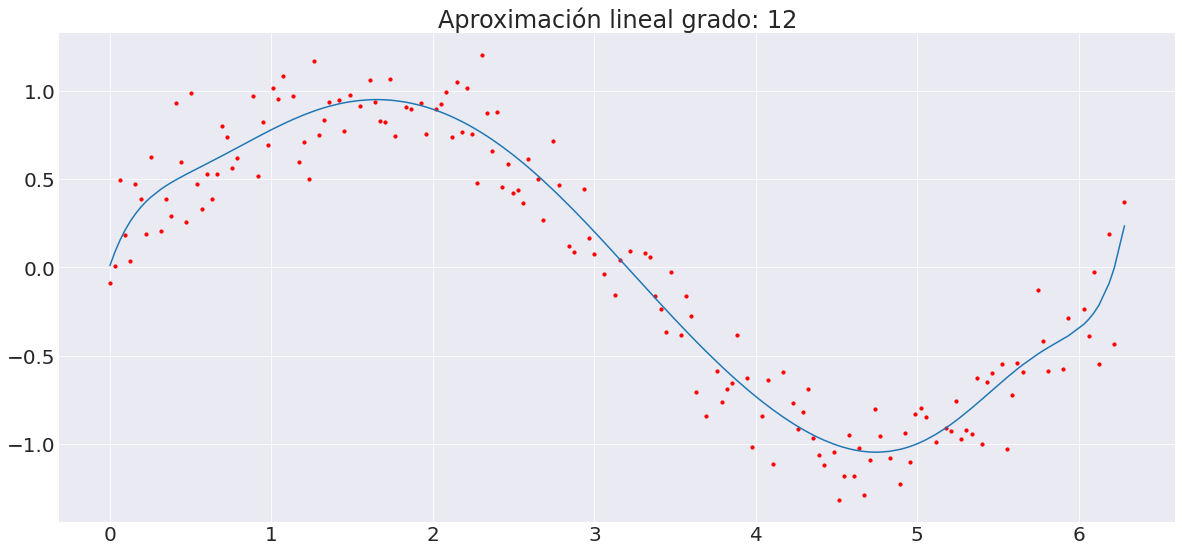

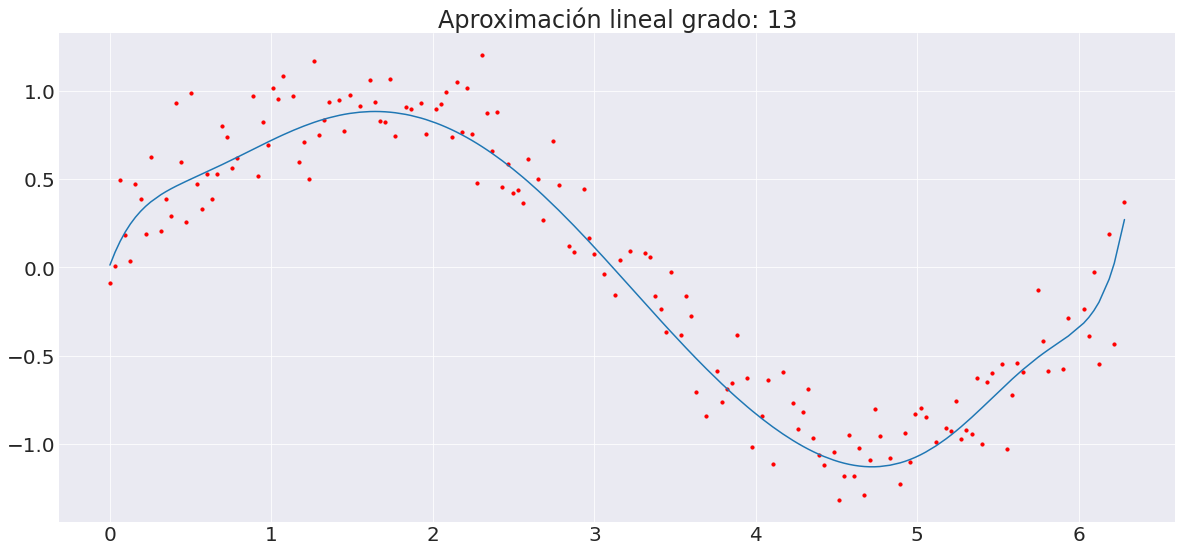

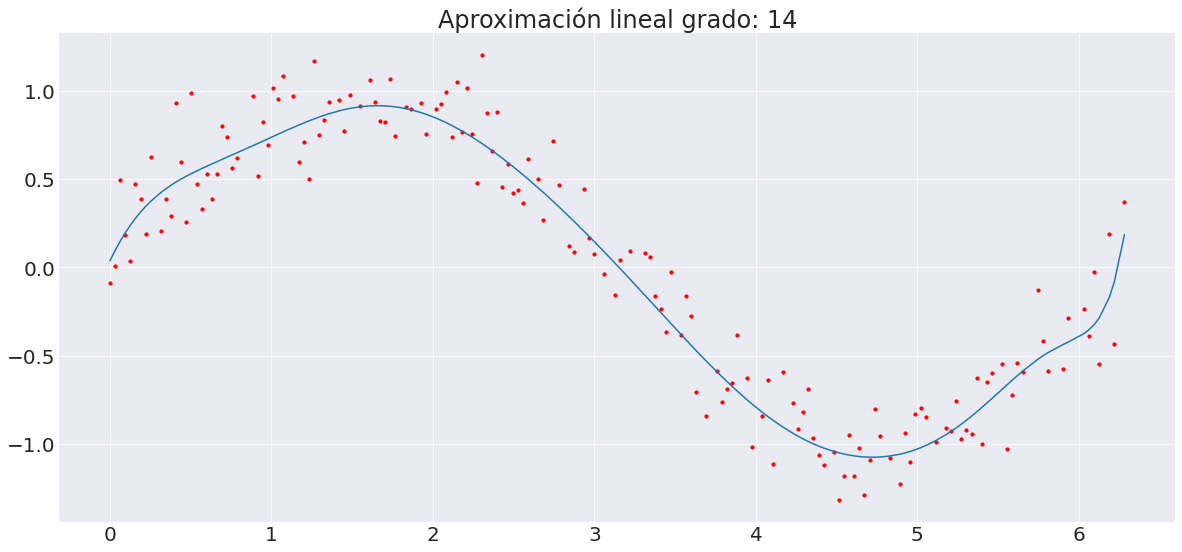

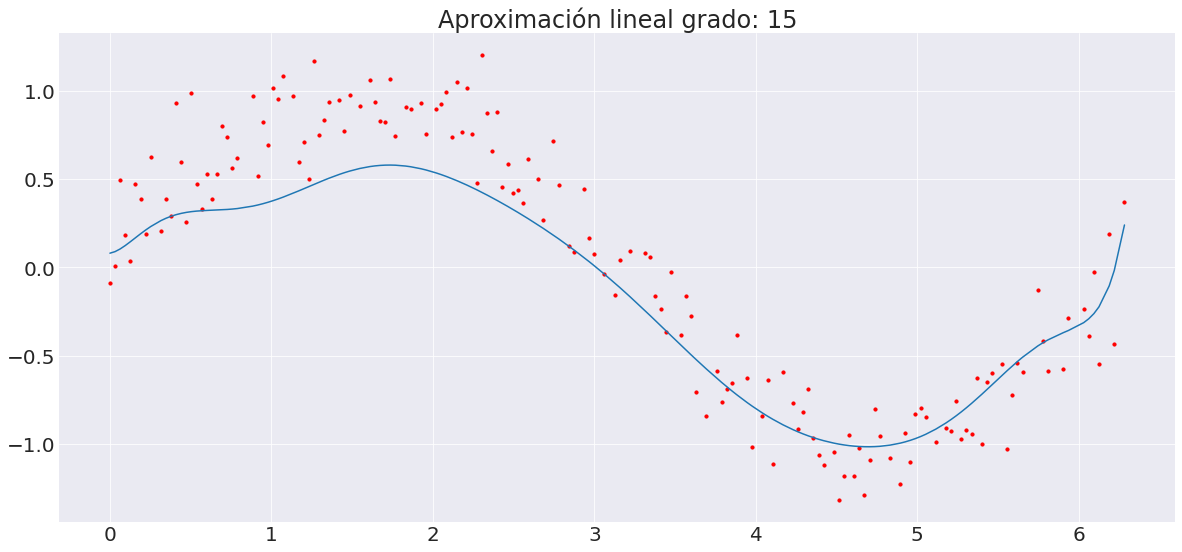

In [7]:
# Calculamos la regresión lineal para diferentes grados de polinomio y graficamos
for i in range(1,16):
    model = AffineLinearRegression()
    x_aux=create_poly(x_train,i)
    model.fit(x_aux,y_train)
    y_train_predicted=model.predict(x_aux)
    plt.figure()
    plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
    plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
    plt.title('Aproximación lineal grado: {}'.format(i))

Se observa que a partir del grado 12, la solución de la aproximación lineal "empeora". Esto no se condice con la matemática, por lo cual debe tratarse de un problema de representación numérica.

Para corroborar, calculamos los coeficientes del polinomio grado 20

Text(0.5, 1.0, 'Aproximación lineal grado: 20')

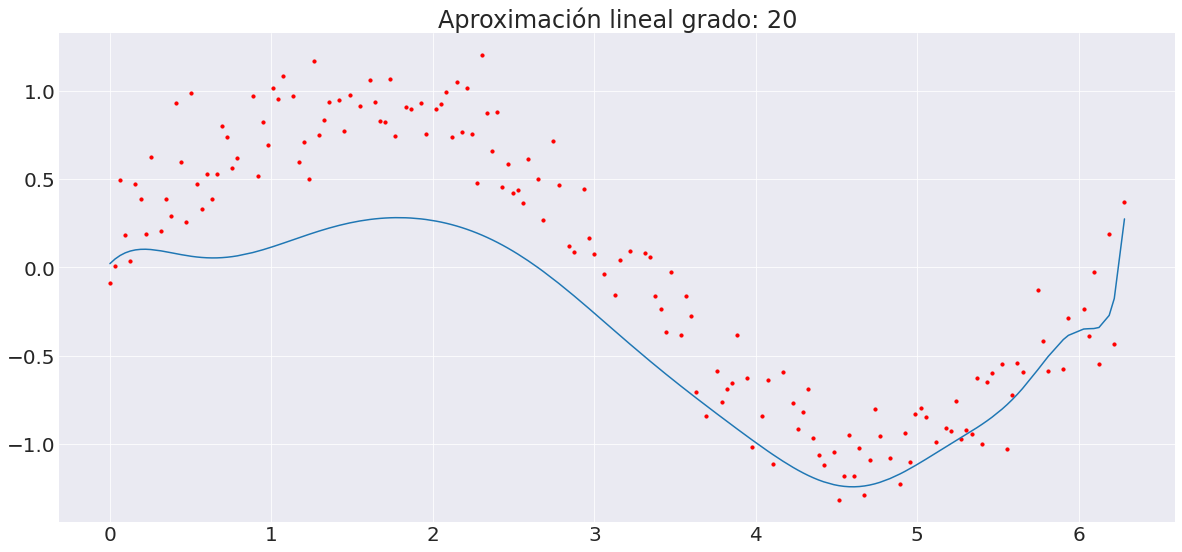

In [8]:
model = AffineLinearRegression()
x_aux=create_poly(x_train,20)
model.fit(x_aux,y_train)
y_train_predicted=model.predict(x_aux)
plt.figure()
plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
plt.title('Aproximación lineal grado: {}'.format(20))

In [9]:
print(x_aux[20,:])

[4.73606933e-01 2.24303527e-01 1.06231705e-01 5.03120721e-02
 2.38281461e-02 1.12851752e-02 5.34473721e-03 2.53130460e-03
 1.19884341e-03 5.67780549e-04 2.68904804e-04 1.27355179e-04
 6.03162959e-05 2.85662159e-05 1.35291579e-05 6.40750297e-06
 3.03463783e-06 1.43722551e-06 6.80679967e-07 3.22374751e-07]


In [10]:
print(model._W)

[[ 9.32751200e-01]
 [-3.44069613e+00]
 [ 4.39676171e+00]
 [-1.55633239e+00]
 [-8.96724316e-01]
 [ 7.84432046e-01]
 [-1.89073544e-02]
 [-1.67272199e-01]
 [ 6.92340003e-02]
 [-9.77916459e-03]
 [-9.43121386e-05]
 [ 5.36400742e-05]
 [ 1.87651143e-05]
 [ 9.16577735e-07]
 [-8.41704711e-07]
 [-2.68405078e-08]
 [ 9.73049610e-09]
 [ 3.72633095e-09]
 [-7.43700680e-10]
 [ 3.64983033e-11]
 [ 2.15570732e-02]]


Notamos que para los coeficientes de mayor orden, se realizan multiplicaciónes de exponentes muy grandes.

Esto genera mucho error por los límites de la representación numérica de punto flotante. 

Repetimos las gráficas anteriores con algoritmos de descenso por gradiente

In [11]:
# Implementacion Gradient Descent
class GradientDescent:
    """
    Modelo de aproximación con regresión afín a la lineal
    """
    _W=None
    
    def __init__(self):
        pass
    
    def fit(self, x, y, lr=0.001, epochs=100):
        """
        Función de ajuste de W
        
        Args:
            x (numpy array): array de valores de entrada
            y (numpy array): array de valores de salida

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
    
        n = x.shape[0]
        m = x.shape[1]

        # initialize random weights
        W = np.zeros(shape=(m, 1),dtype='float64') # mx1

        for i in range(epochs):
            # Calculate the predictions for all samples
            prediction = x@W  # nx1

            # Calculate the error for all samples
            error = y - prediction[:,0]  # nx1

            # Calculate the gradient for all samples
            grad_sum = np.sum(error[:,np.newaxis] * x, axis=0)
            grad_mul = -2/n * grad_sum  # 1xm
            gradient = grad_mul[:,np.newaxis]
                
            # Update all the weights
            W = W - (lr * gradient) # mx1

        self._W=W
        
        return
    
    def predict(self,x):
        """
        Función de predicción
        
        Args:
            x (numpy array): array de valores de entrada
            
        Returns
            numpy array: array de predicciones

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=np.transpose(self._W)@np.transpose(x)
        return y[0,:]

<ipython-input-11-1c56adf71612>:38: RuntimeWarning: overflow encountered in multiply
  grad_sum = np.sum(error[:,np.newaxis] * x, axis=0)
C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-11-1c56adf71612>:32: RuntimeWarning: invalid value encountered in matmul
  prediction = x@W  # nx1


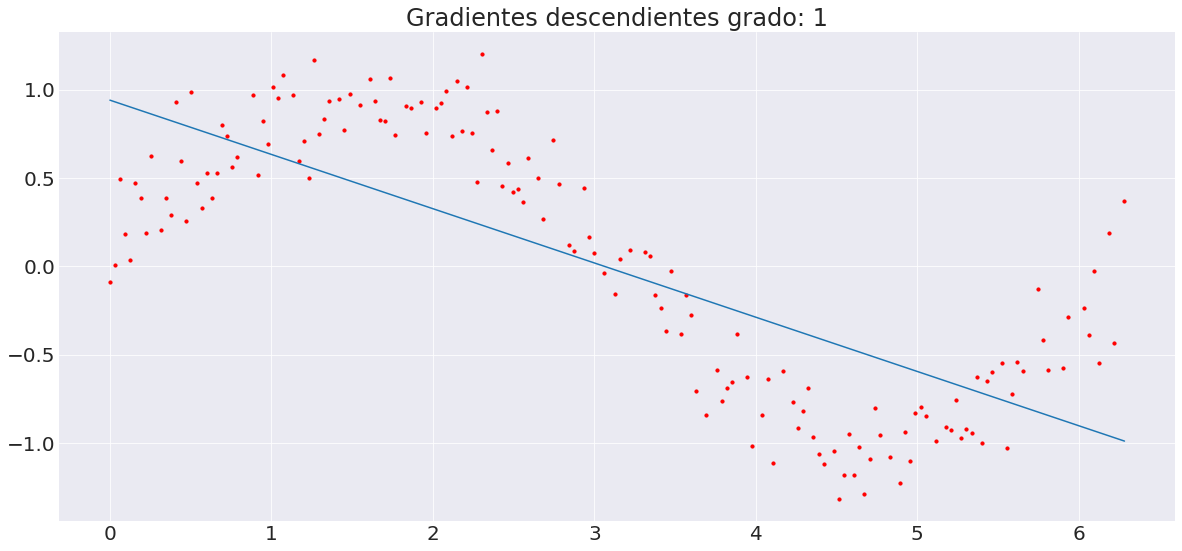

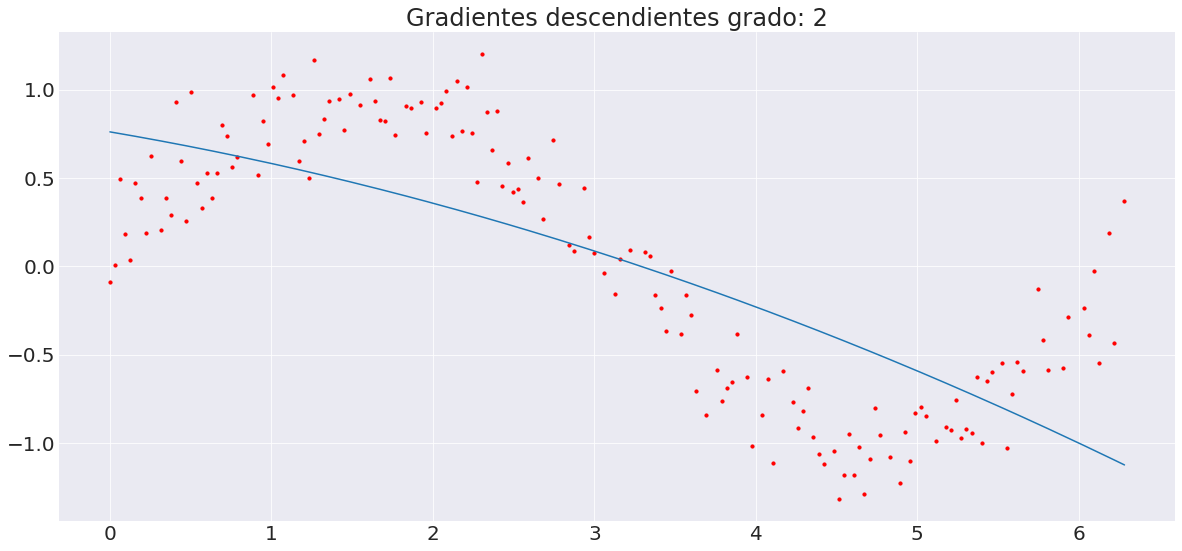

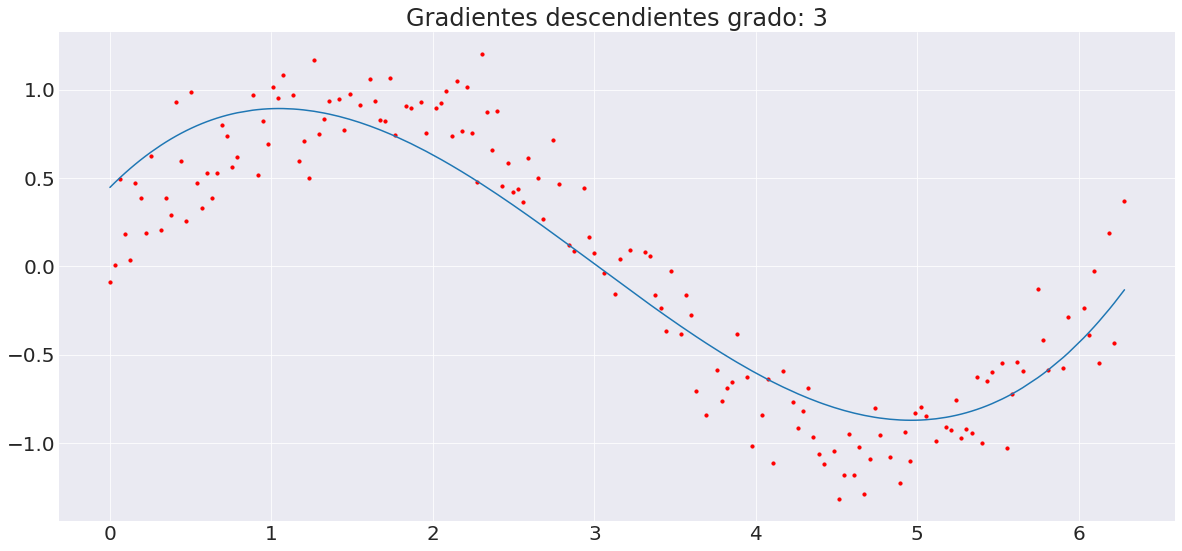

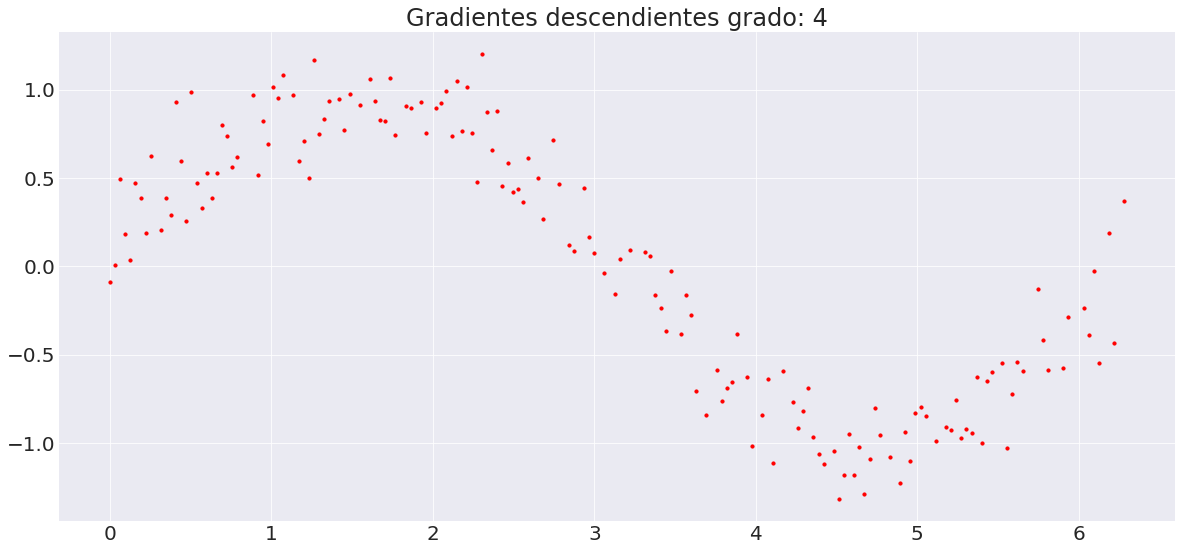

In [12]:
for i in range(1,5):
    model = GradientDescent()
    x_aux=create_poly(x_train,i)
    model.fit(x_aux,y_train, lr=0.0001, epochs=100000)
    y_train_predicted=model.predict(x_aux)
    plt.figure()
    plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
    plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
    plt.title('Gradientes descendientes grado: {}'.format(i))

#### Nota
Observamos que para polinomio de grado 4 (y mayores también) la solución diverge con el learning rate seleccionado. 

Entendemos que esto se debe a una problematica en la diferencia de escalas de los features, que genera que sea necesario aplicar diferentes LR para los diferentes features.

Para salvar esto, una posible solución sería normalizar los features previamente. A continuacion aplicamos esta metodología. 

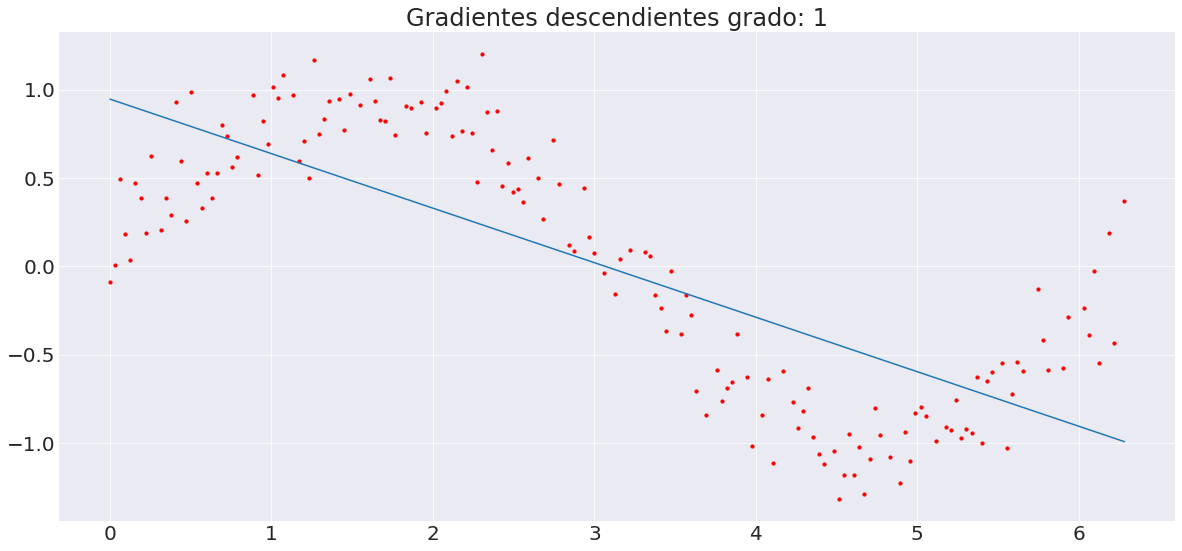

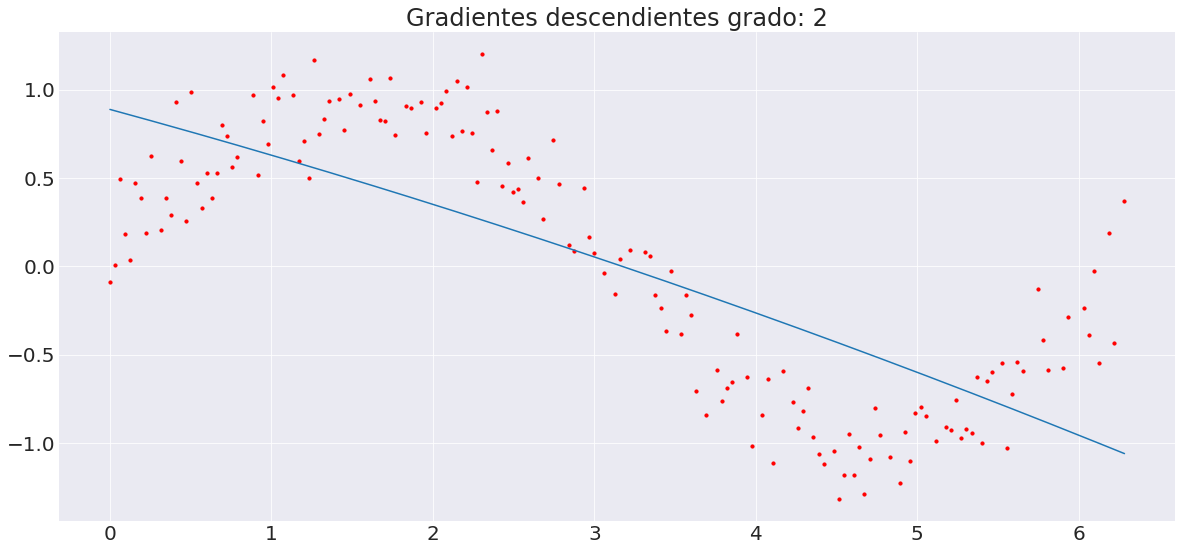

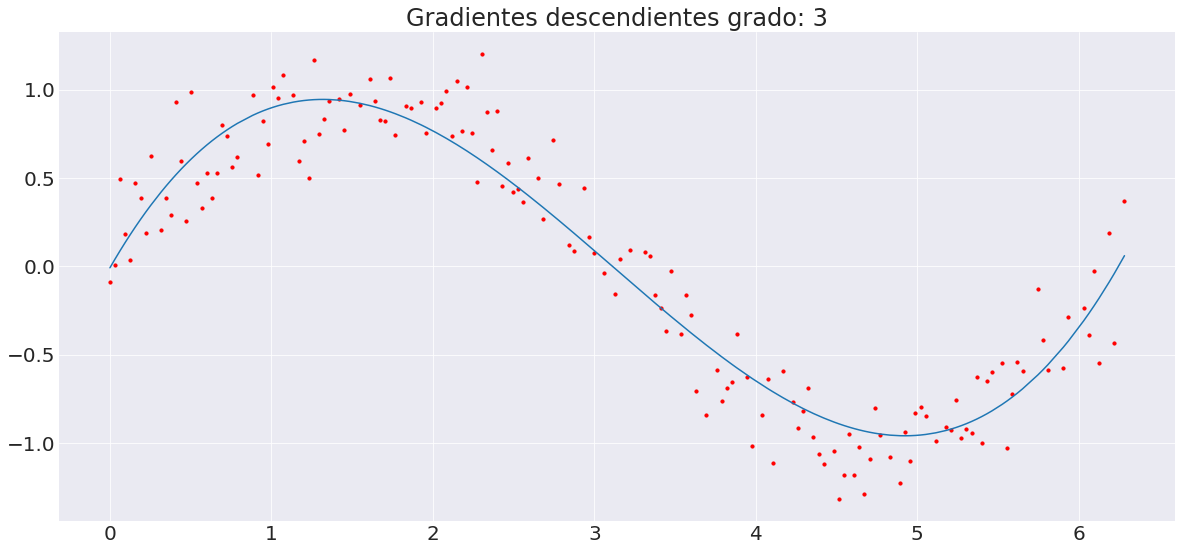

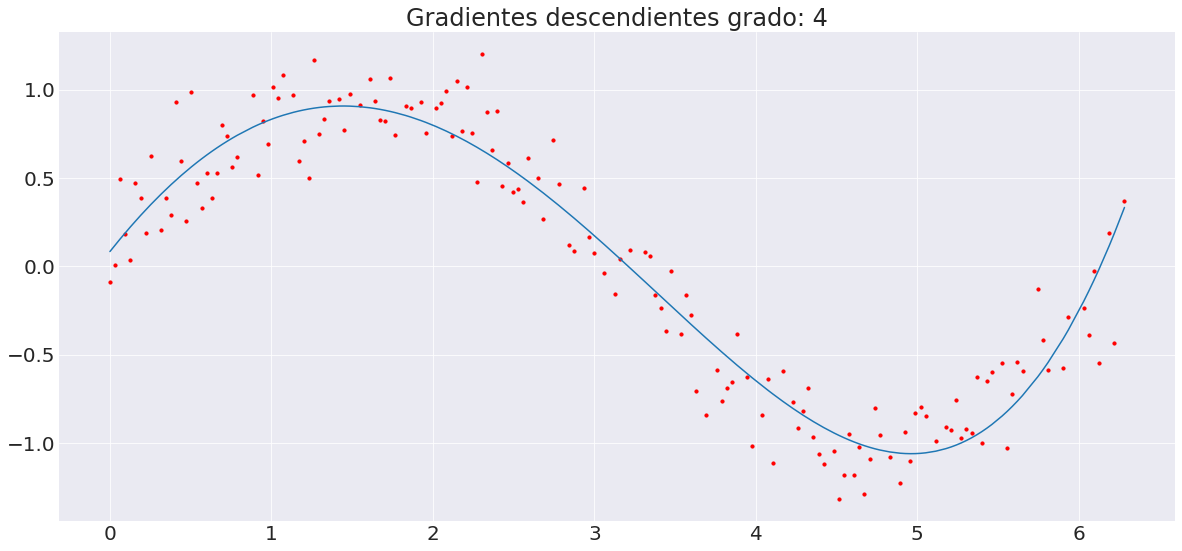

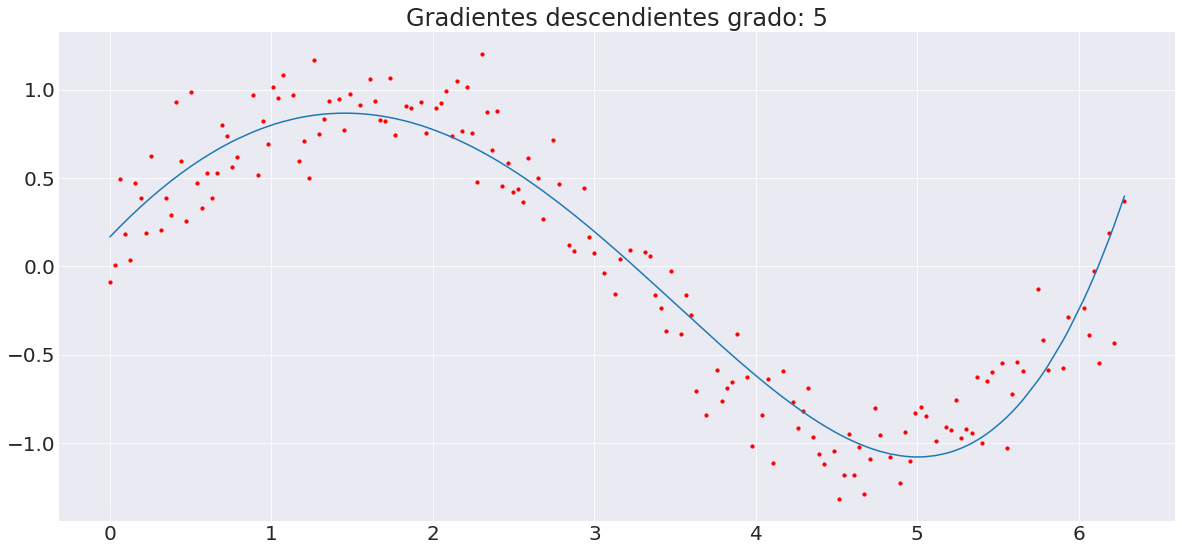

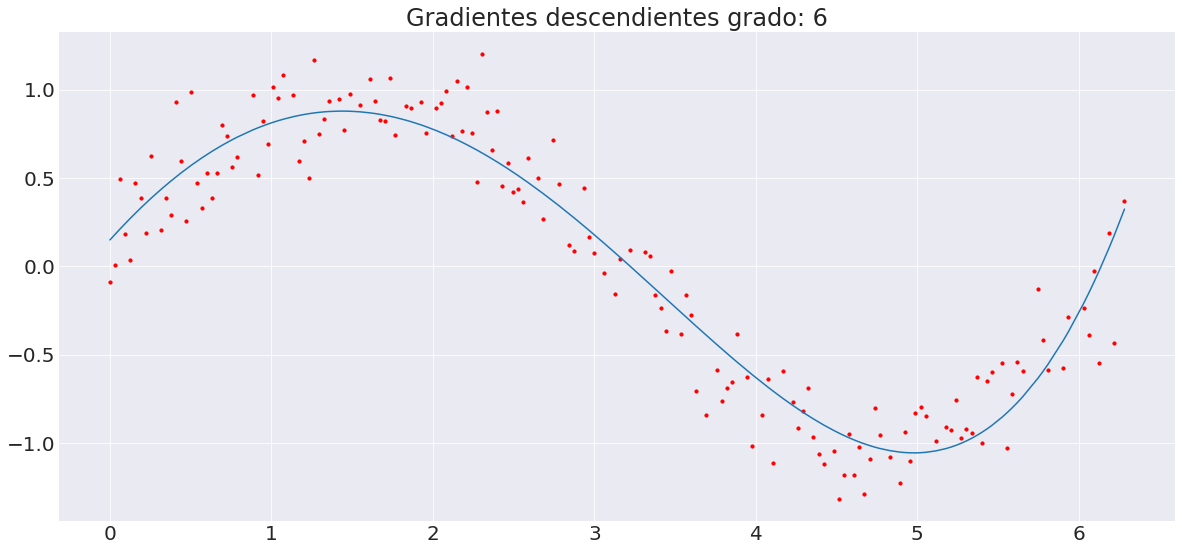

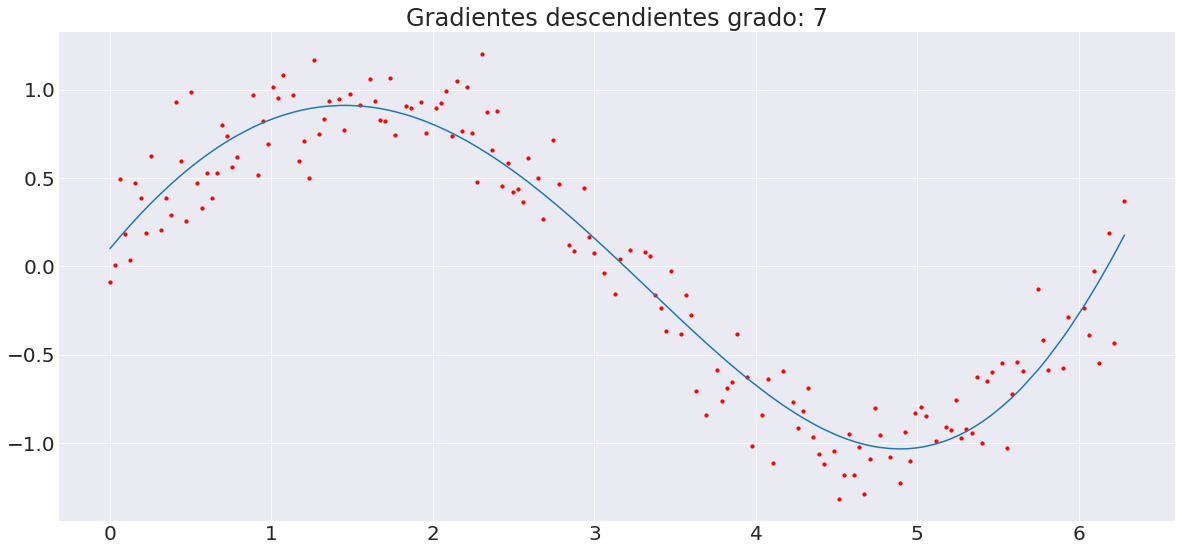

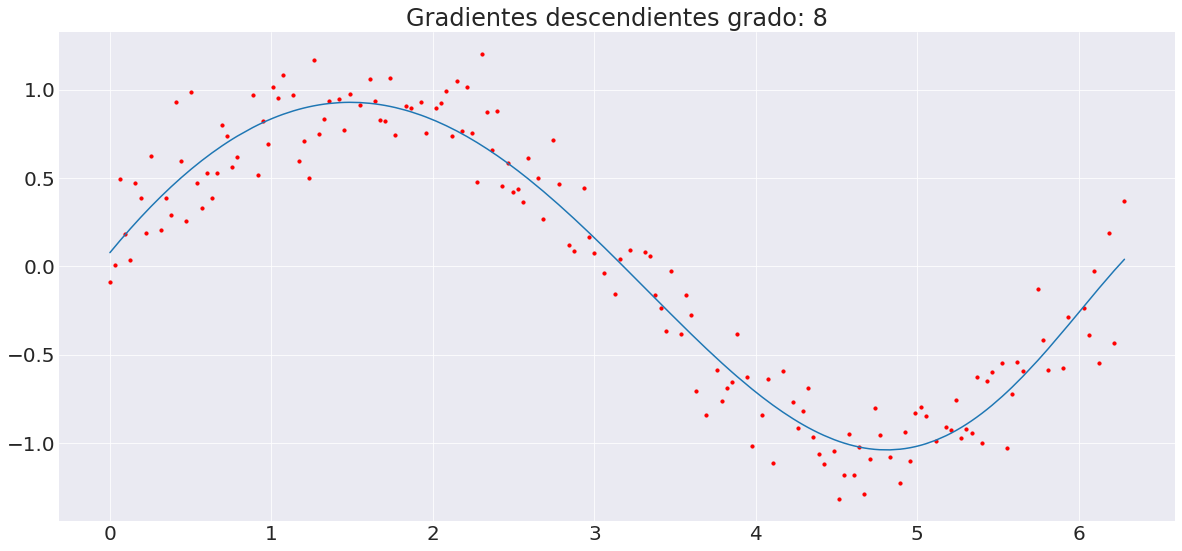

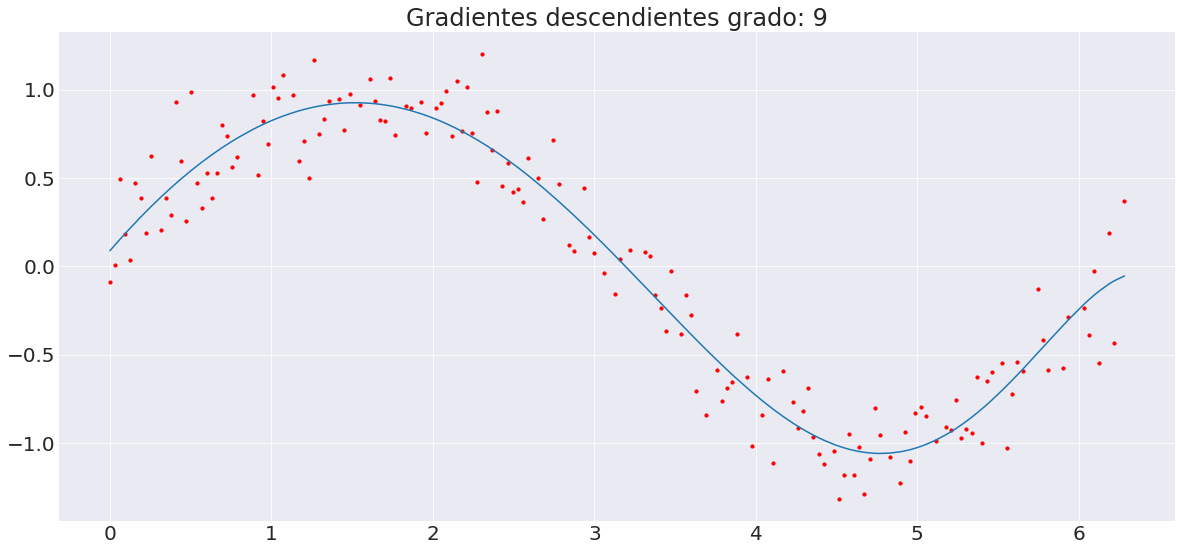

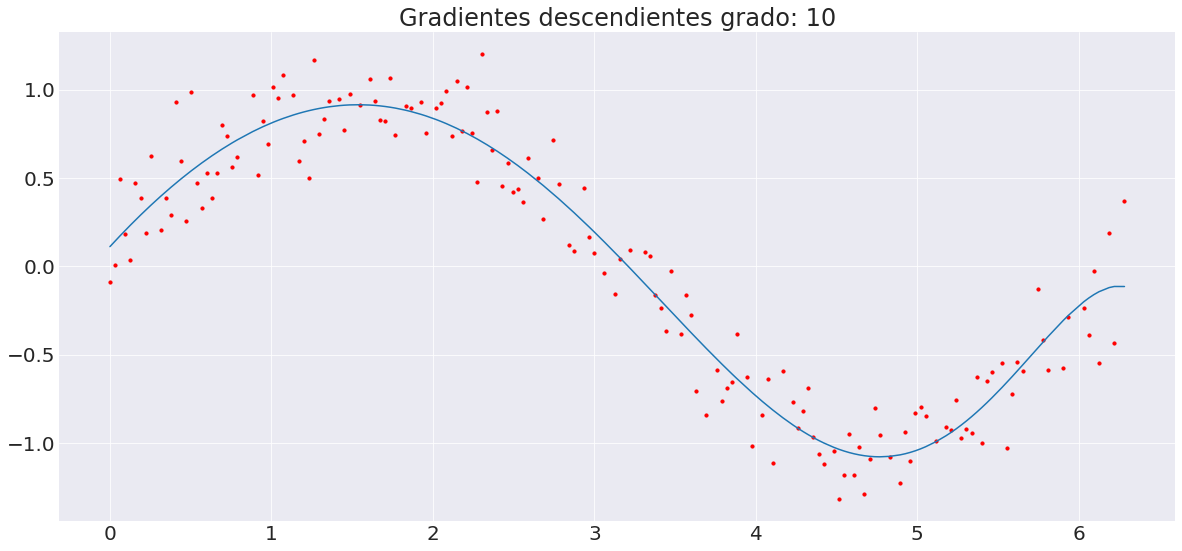

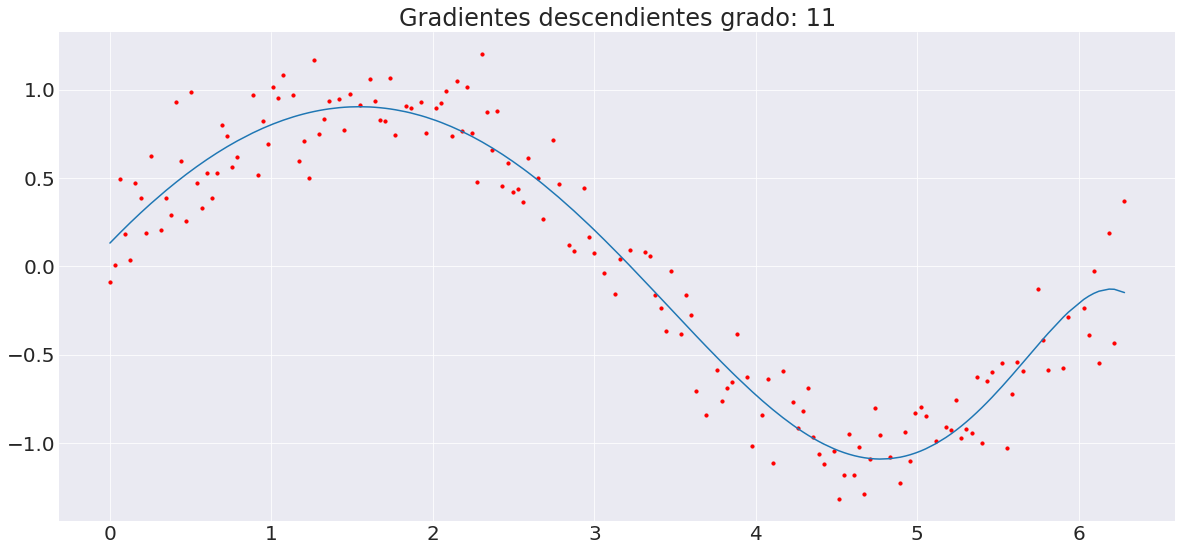

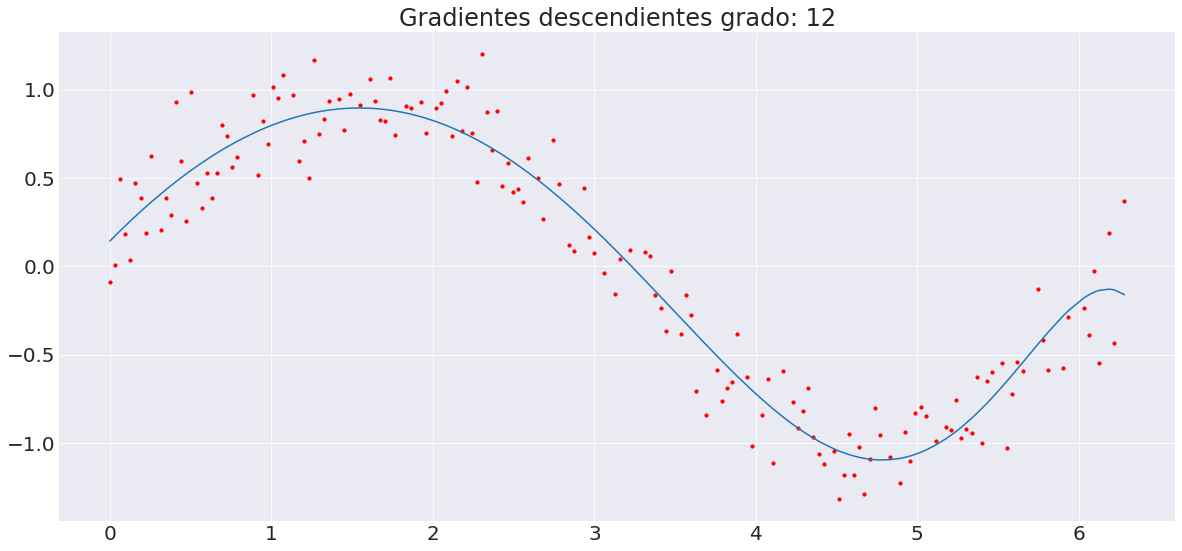

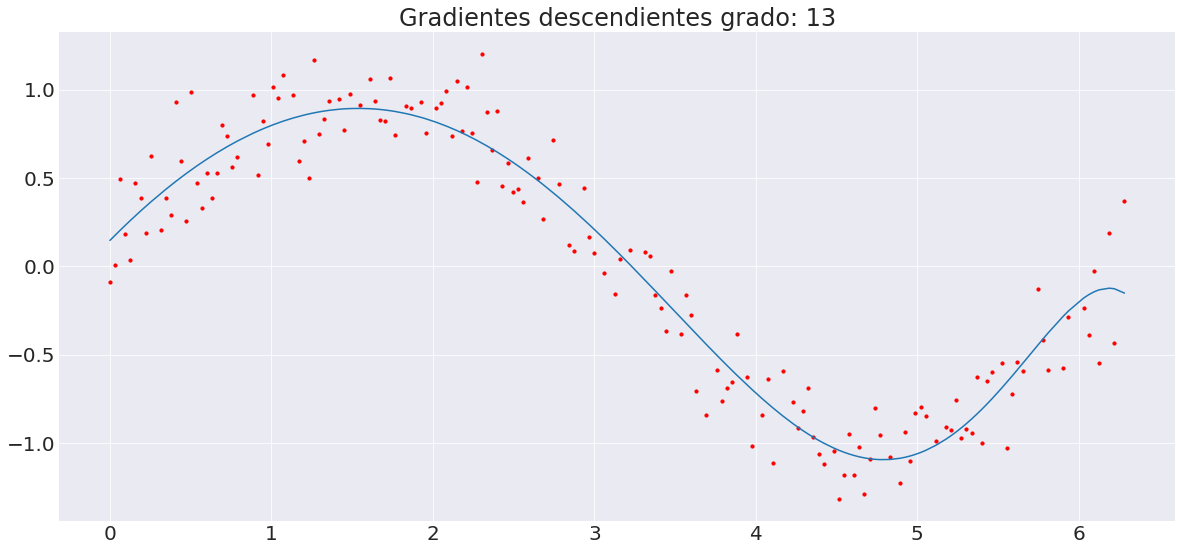

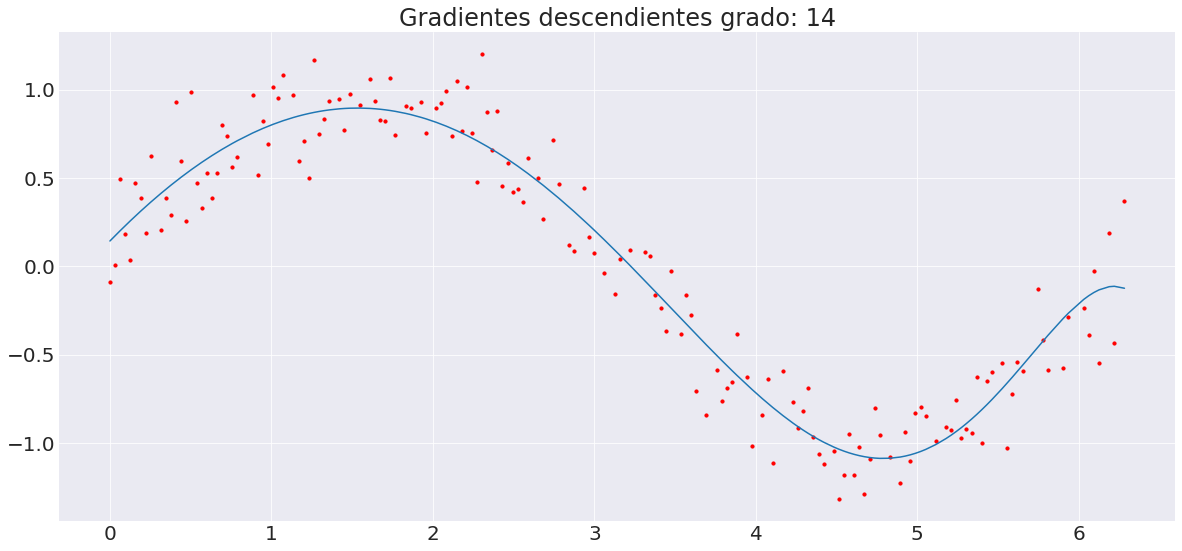

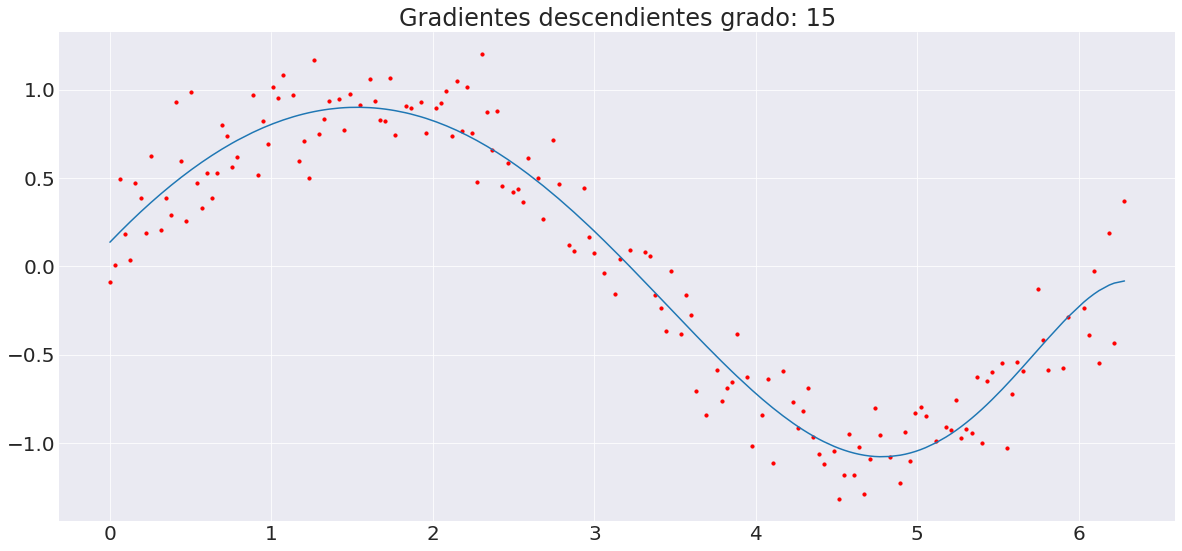

In [13]:
for i in range(1,16):
    model = GradientDescent()
    x_aux=create_poly(x_train,i)
    scaler = StandardScaler()
    x_scale=scaler.fit_transform(x_aux)
    model.fit(x_scale,y_train, lr=0.01, epochs=100000)
    y_train_predicted=model.predict(x_scale)
    plt.figure()
    plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
    plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
    plt.title('Gradientes descendientes grado: {}'.format(i))

In [14]:
# Implementacion Gradient Descent Stochastic
class StochasticGradientDescent:
    """
    Modelo de aproximación con regresión afín a la lineal
    """
    _W=None
    
    def __init__(self):
        pass
    
    def fit(self, x, y, lr=0.001, epochs=100):
        """
        Función de ajuste de W
        
        Args:
            x (numpy array): array de valores de entrada
            y (numpy array): array de valores de salida

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
    
        n = x.shape[0]
        m = x.shape[1]

        # initialize random weights
        W = np.zeros(shape=(m, 1),dtype='float64') # mx1

        # Iterate over the n_epochs
        for i in range(epochs):
        
            # Shuffle all the samples
            idx = np.random.permutation(x.shape[0])
            x = x[idx]
            y = y[idx]

            # Iterate over each sample
            for j in range(n):
                # Calculate the prediction for each sample
                prediction = x[j]@W  # nx1
                # Calculate the error for each sample
                error = y[j] - prediction  # 1x1
                # Calculate the gradient for each sample
                grad_sum = error * x[j] # 1xm
                grad_mul = -2/n * grad_sum  # 1xm
                gradient = grad_mul[:,np.newaxis]
                
                # Update all the weights
                W = W - (lr * gradient) # mx1

        self._W=W
        
        return
    
    def predict(self,x):
        """
        Función de predicción
        
        Args:
            x (numpy array): array de valores de entrada
            
        Returns
            numpy array: array de predicciones

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=np.transpose(self._W)@np.transpose(x)
        return y[0,:]

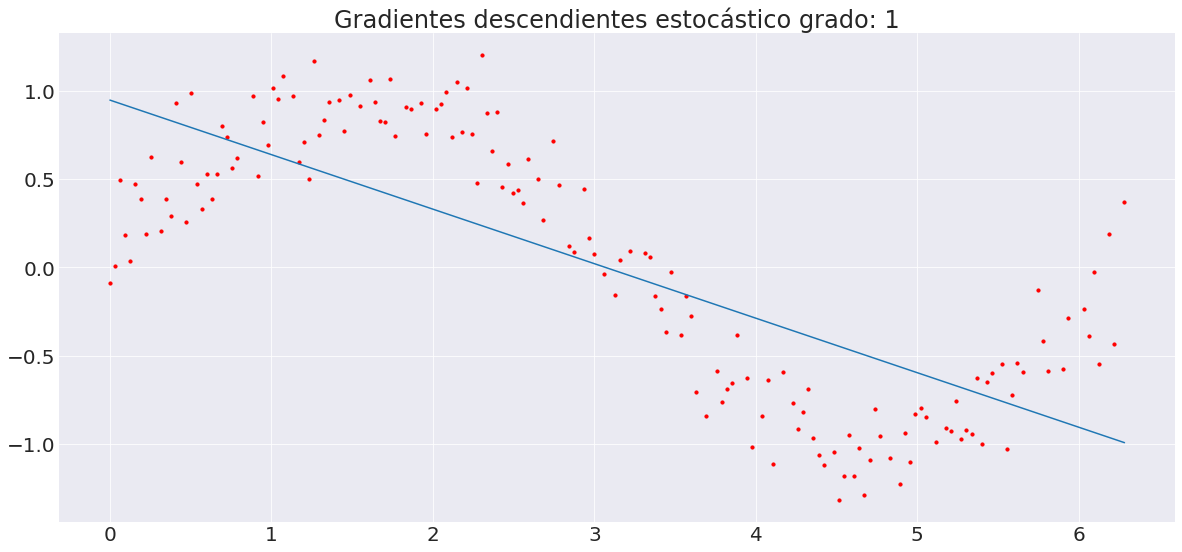

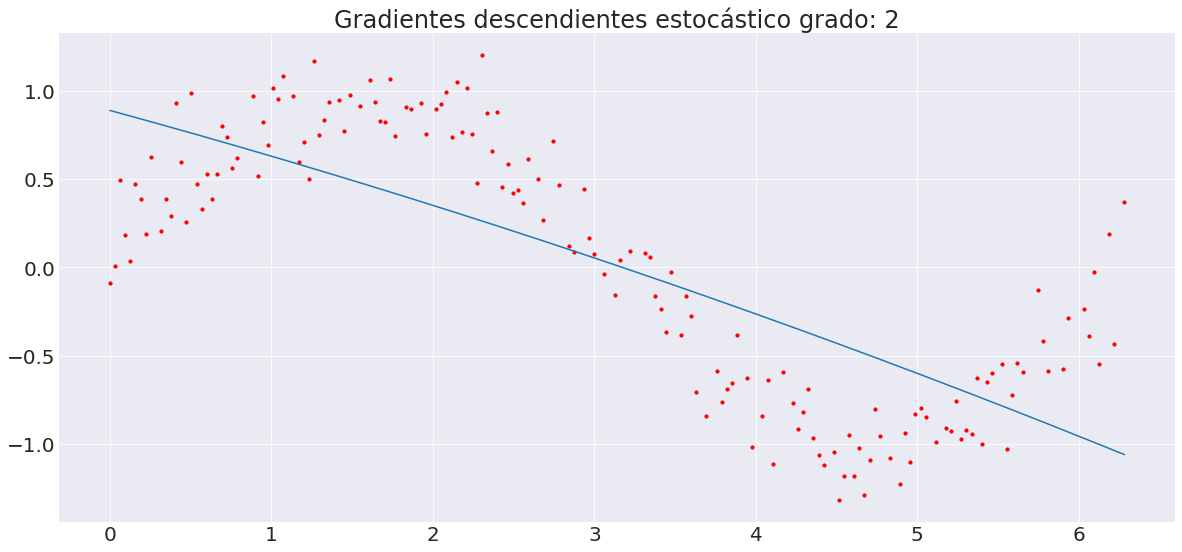

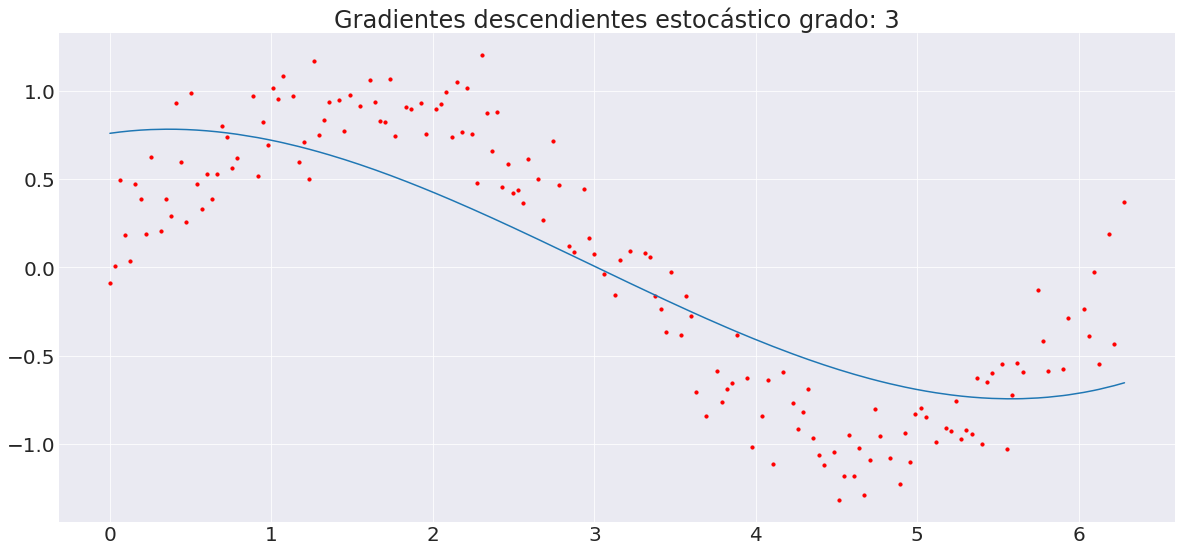

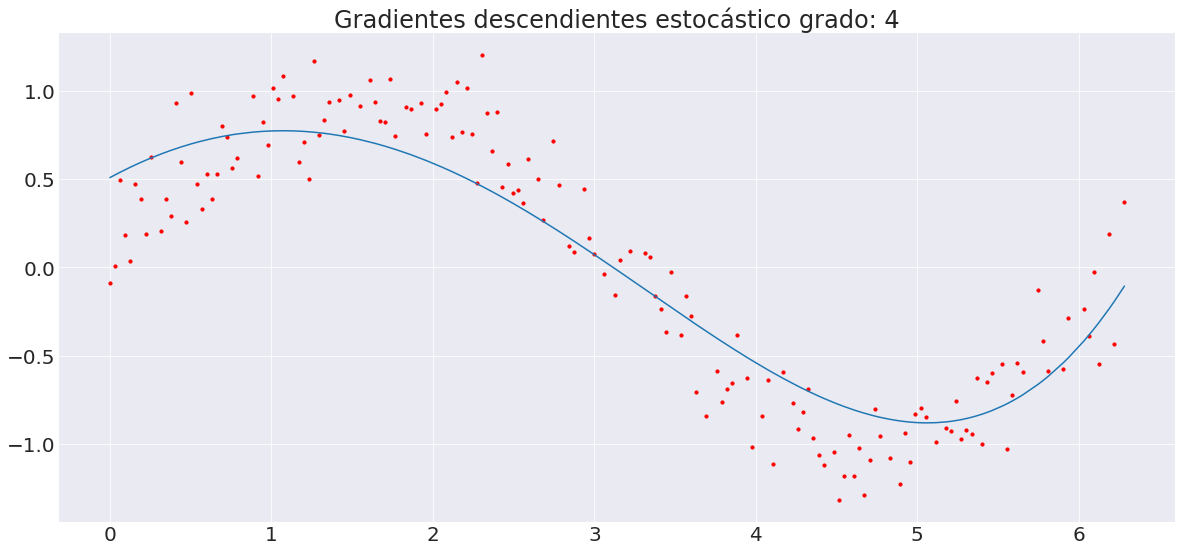

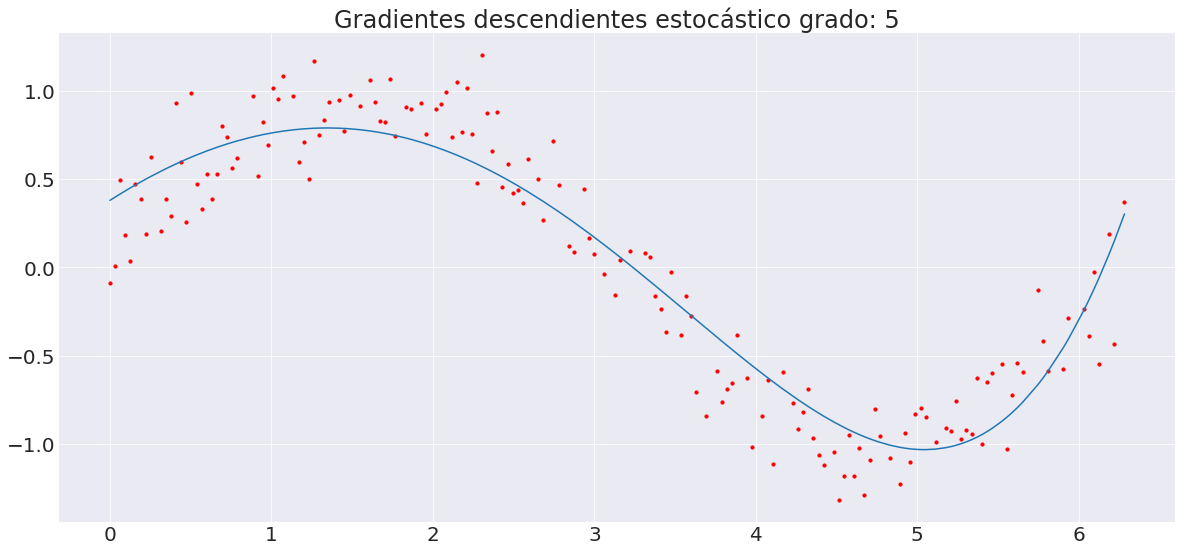

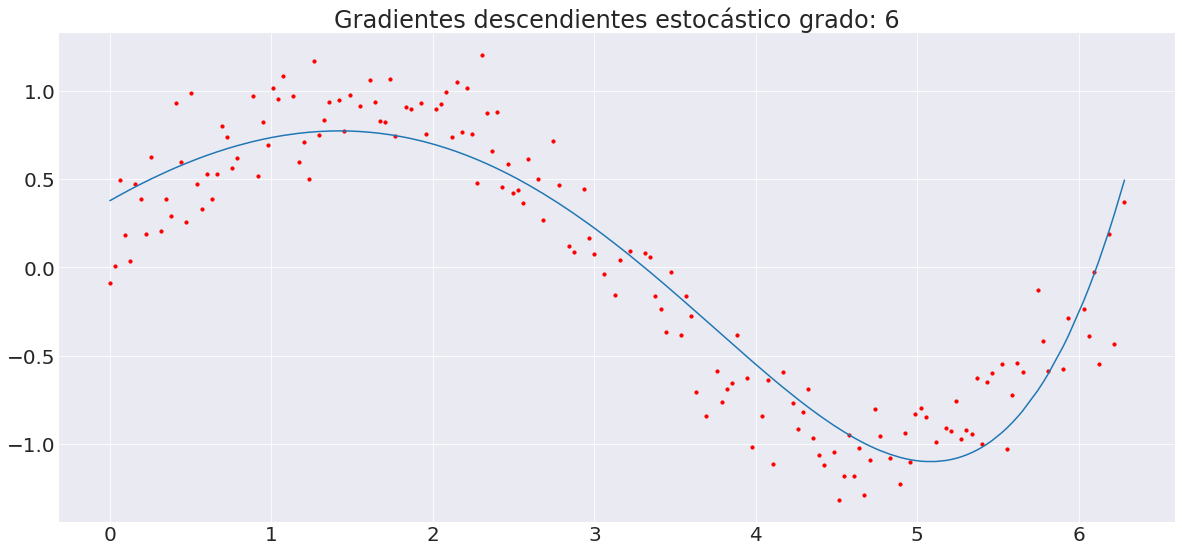

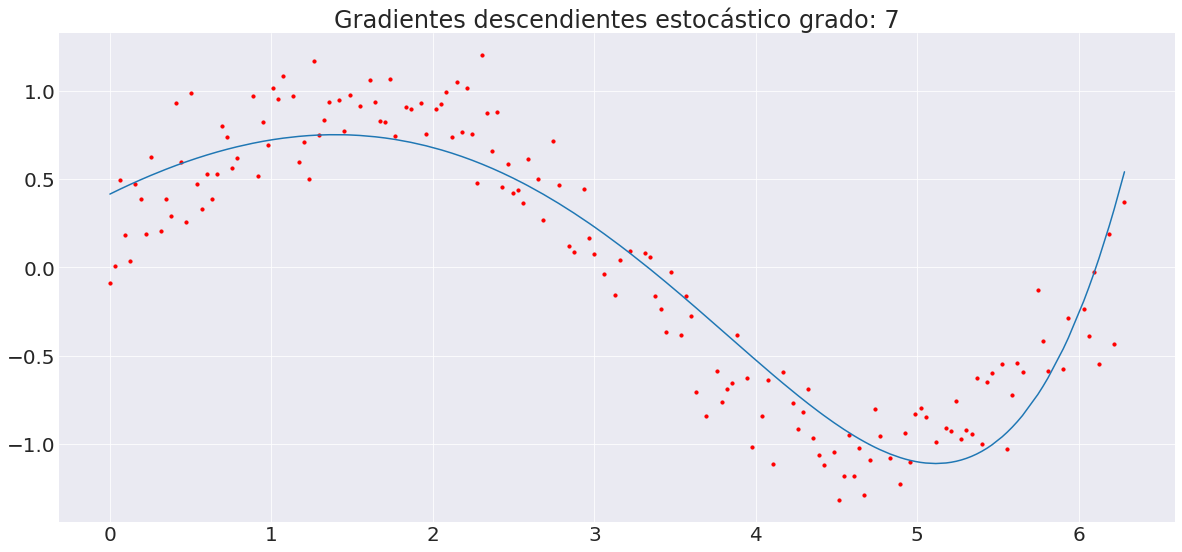

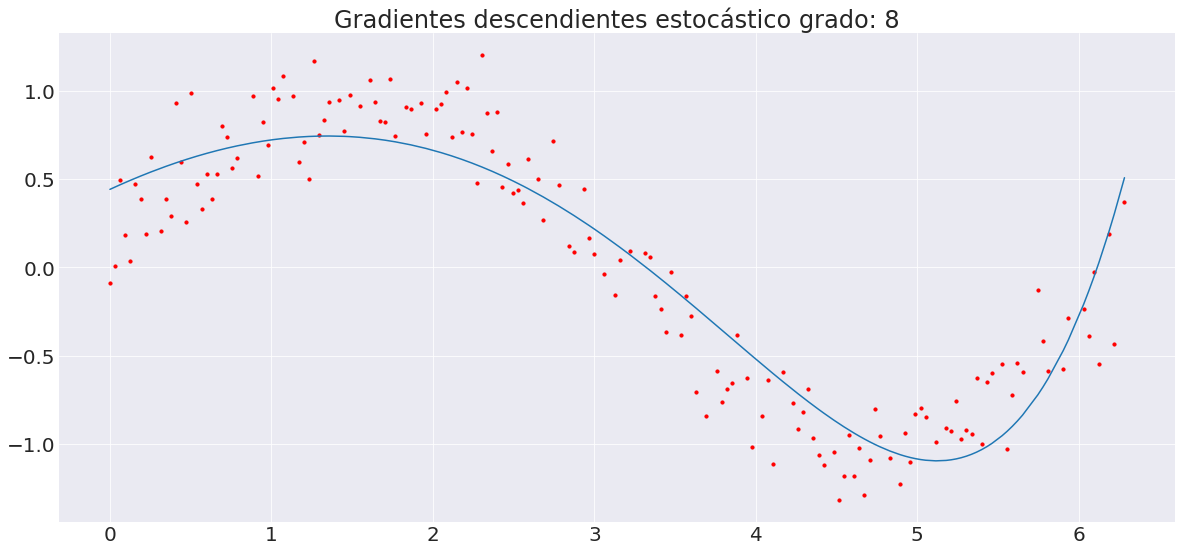

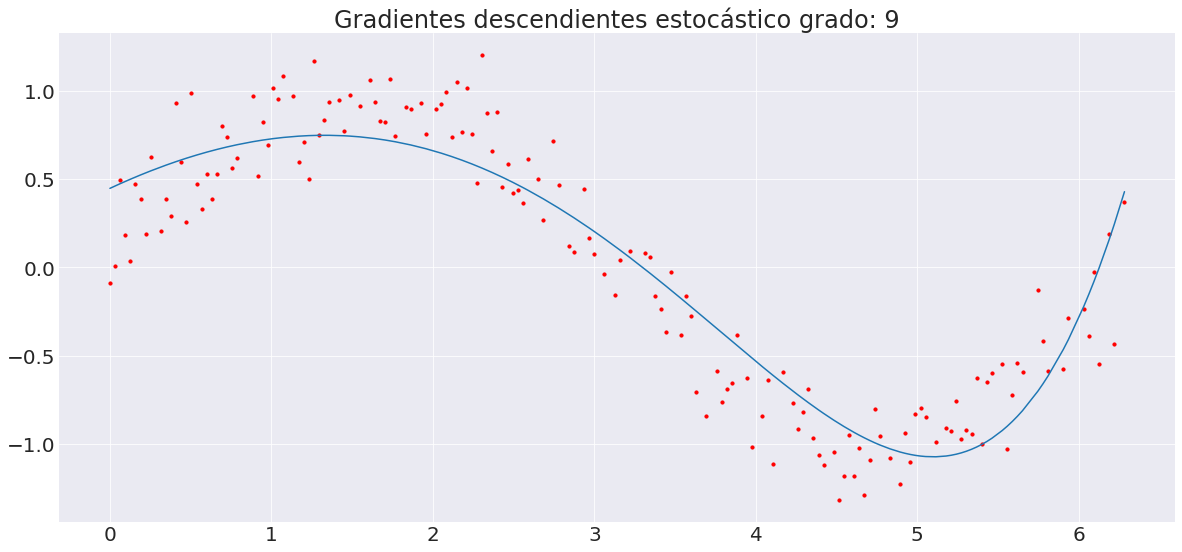

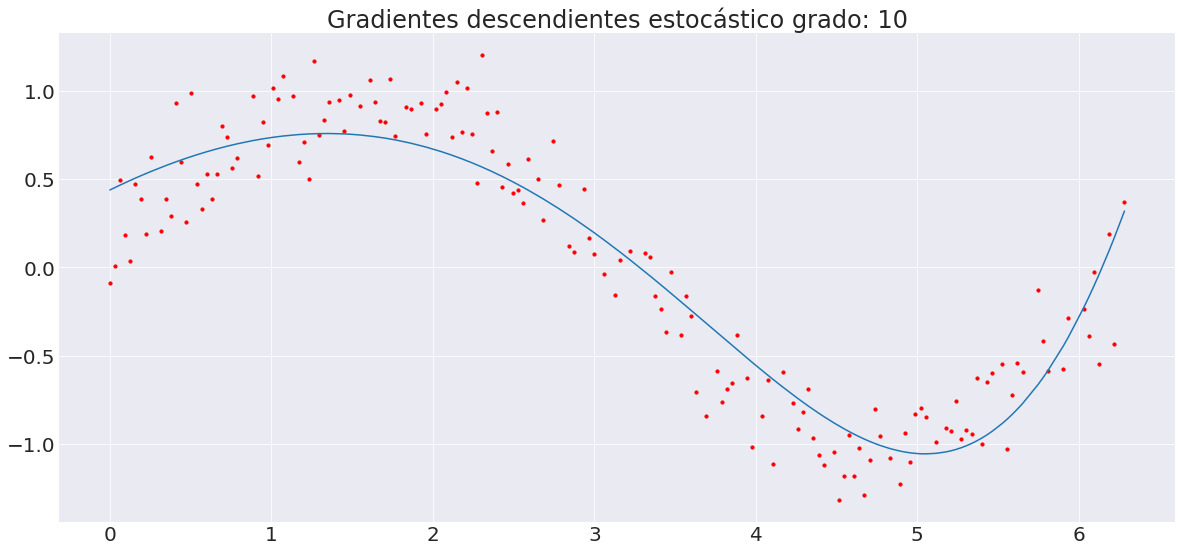

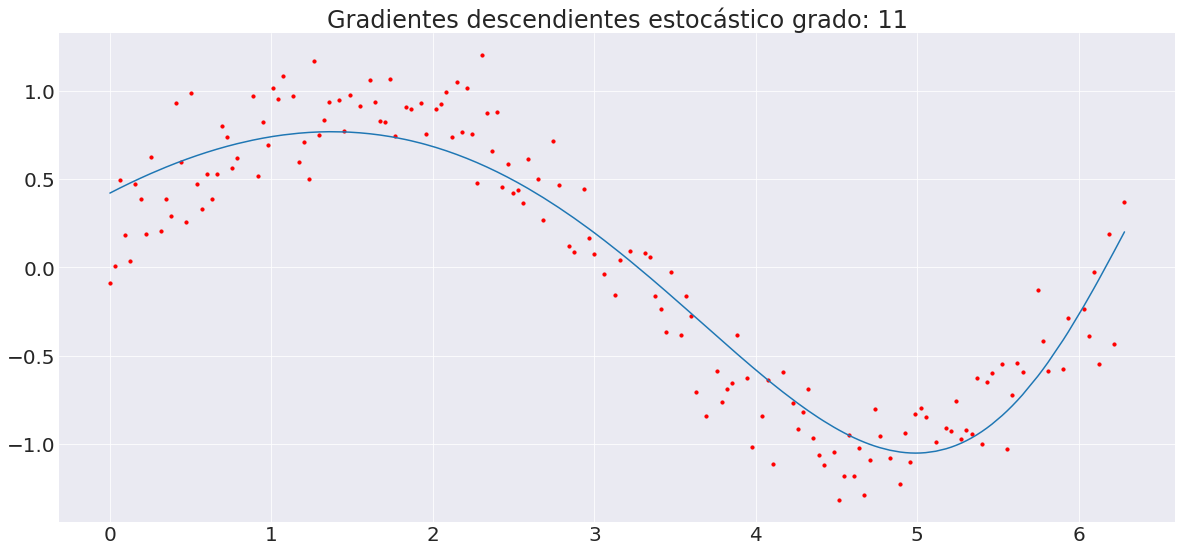

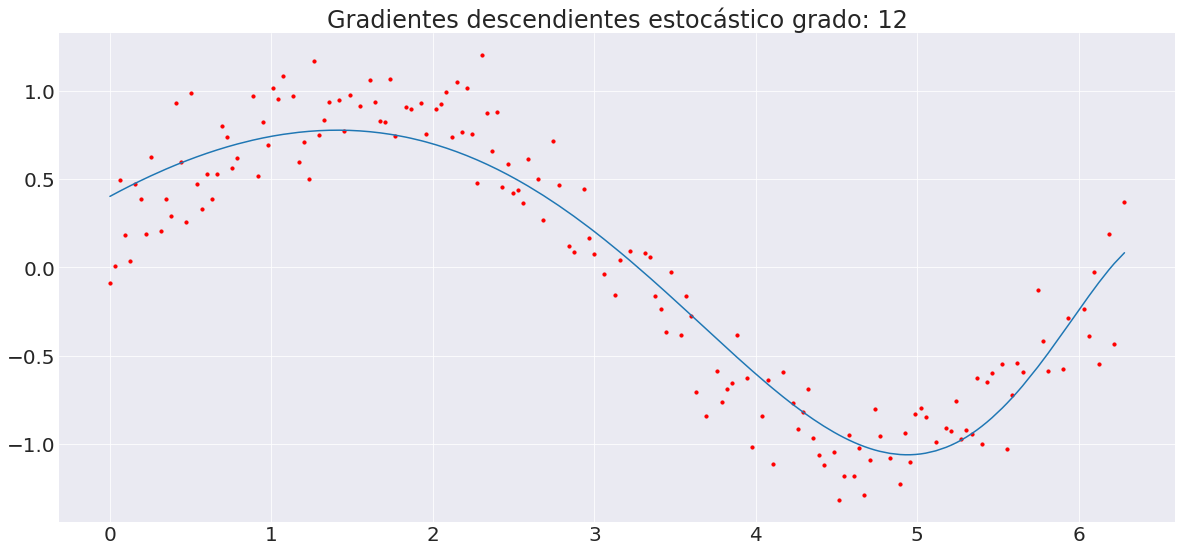

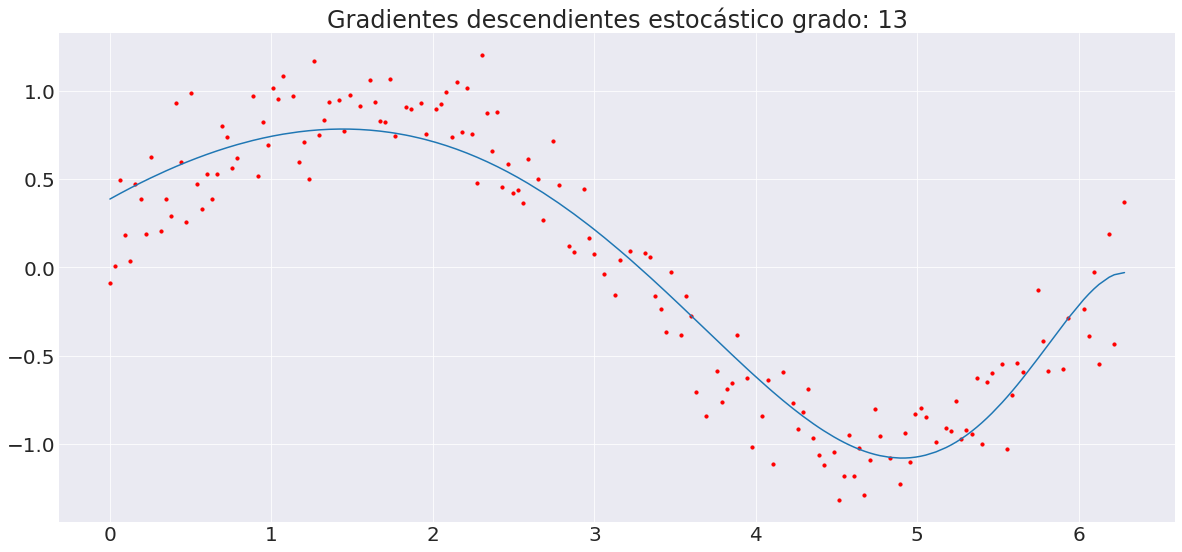

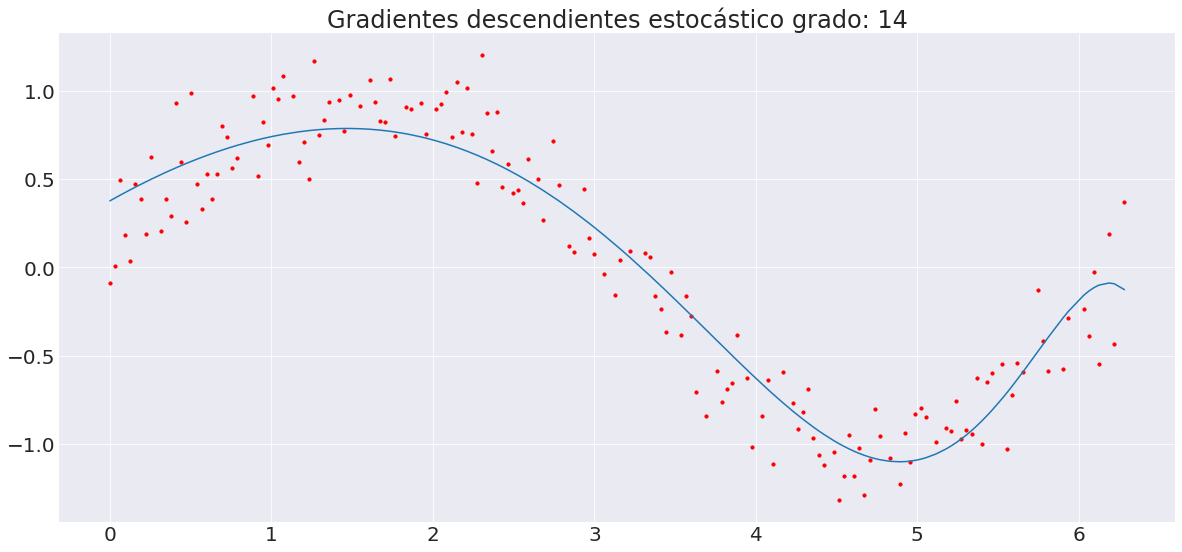

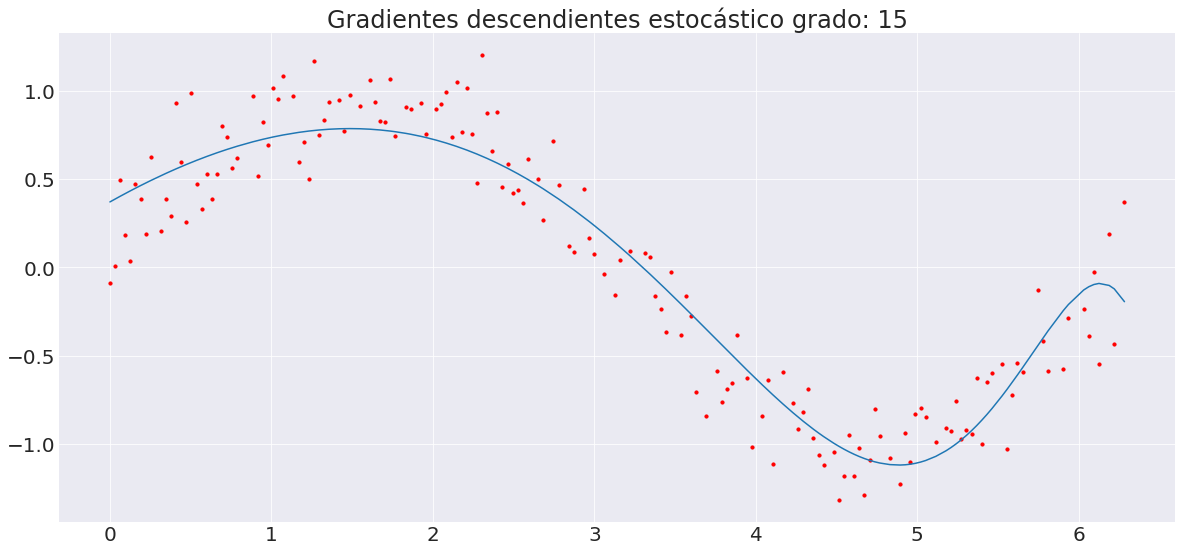

In [15]:
for i in range(1,16):
    model = StochasticGradientDescent()
    x_aux=create_poly(x_train,i)
    scaler = StandardScaler()
    x_scale=scaler.fit_transform(x_aux)
    model.fit(x_scale,y_train, lr=0.01, epochs=10000)
    y_train_predicted=model.predict(x_scale)
    plt.figure()
    plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
    plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
    plt.title('Gradientes descendientes estocástico grado: {}'.format(i))

In [16]:
# Implementacion Gradient Descent
class BatchGradientDescent:
    """
    Modelo de aproximación con regresión afín a la lineal
    """
    _W=None
    
    def __init__(self):
        pass
    
    def fit(self, x, y, lr=0.001, epochs=100, b=10):
        """
        Función de ajuste de W
        
        Args:
            x (numpy array): array de valores de entrada
            y (numpy array): array de valores de salida

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
    
        n = x.shape[0]
        m = x.shape[1]

        # initialize random weights
        W = np.zeros(shape=(m, 1),dtype='float64')

        # iterate over the n_epochs
        for i in range(epochs):

            # Shuffle all the samples 
            idx = np.random.permutation(x.shape[0])
            x = x[idx]
            y = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(x) / b)

            # Iterate over the batches
            for i in range(0, len(x), batch_size):

                end = i + batch_size if i + batch_size <= len(x) else len(x)
                batch_X = x[i: end] # batch_size*m
                batch_y = y[i: end] # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = batch_X@W  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction[:,0]  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error[:,np.newaxis]* batch_X, axis=0) # 1xm
                grad_mul = -2/batch_size * grad_sum  # 1xm
                gradient = grad_mul[:,np.newaxis]  # mx1

                # Update the weights
                W = W - (lr * gradient)

        self._W=W
        
        return
    
    def predict(self,x):
        """
        Función de predicción
        
        Args:
            x (numpy array): array de valores de entrada
            
        Returns
            numpy array: array de predicciones

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=np.transpose(self._W)@np.transpose(x)
        return y[0,:]

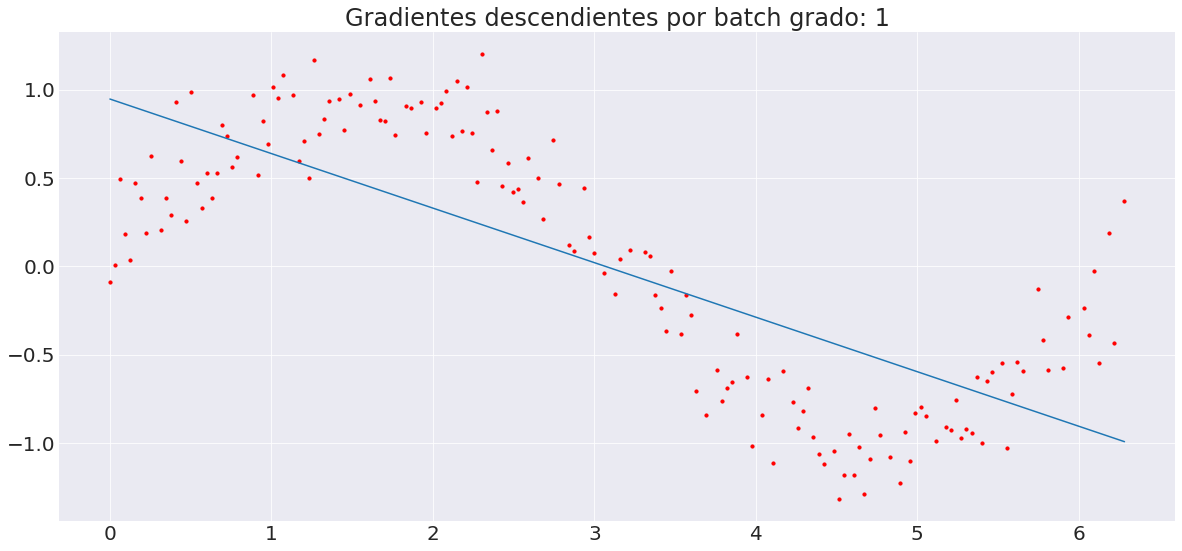

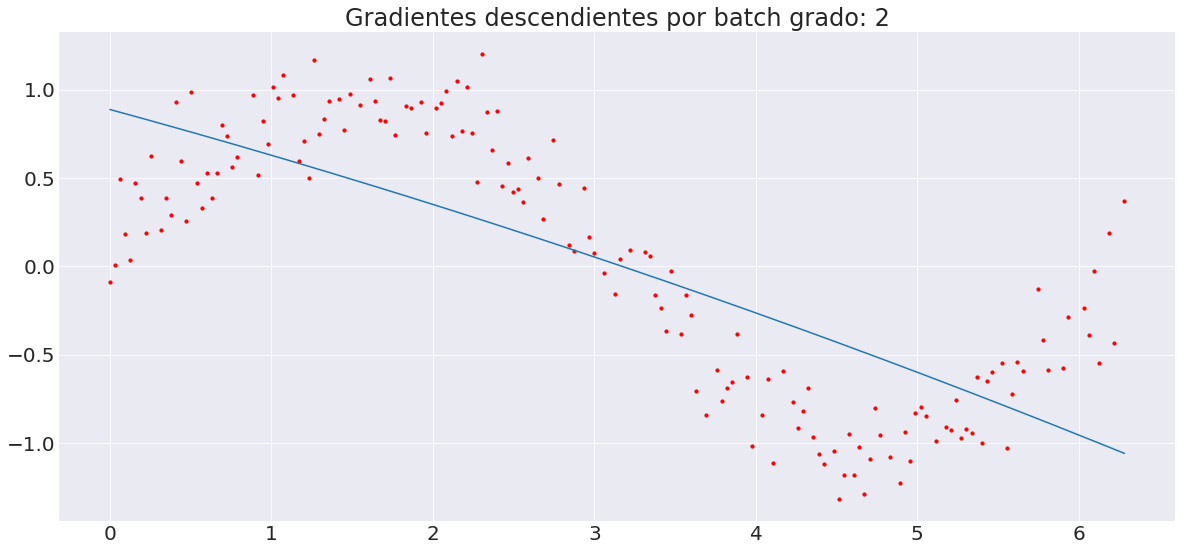

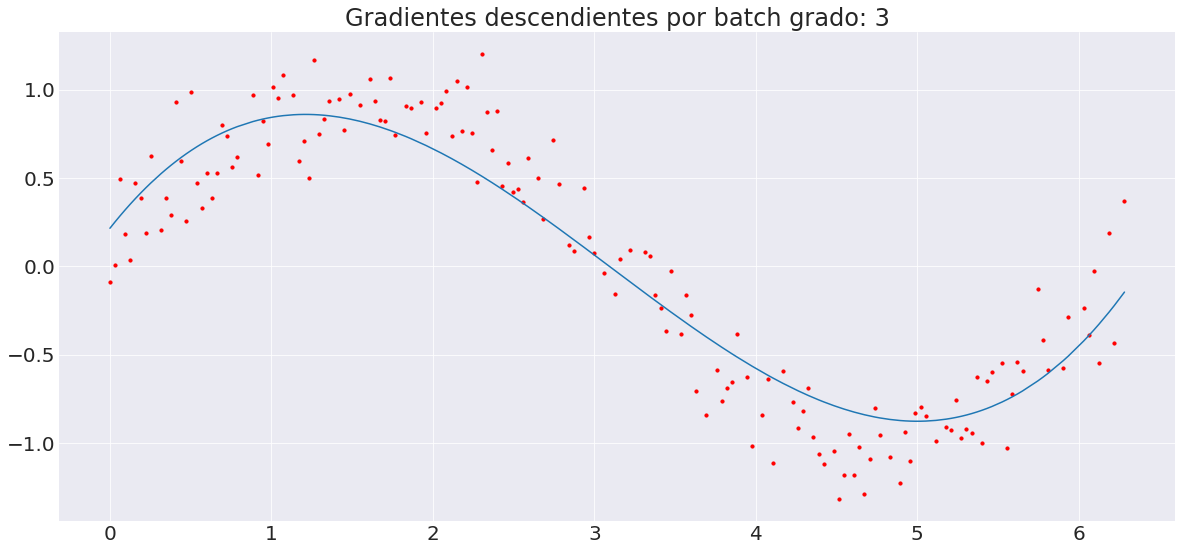

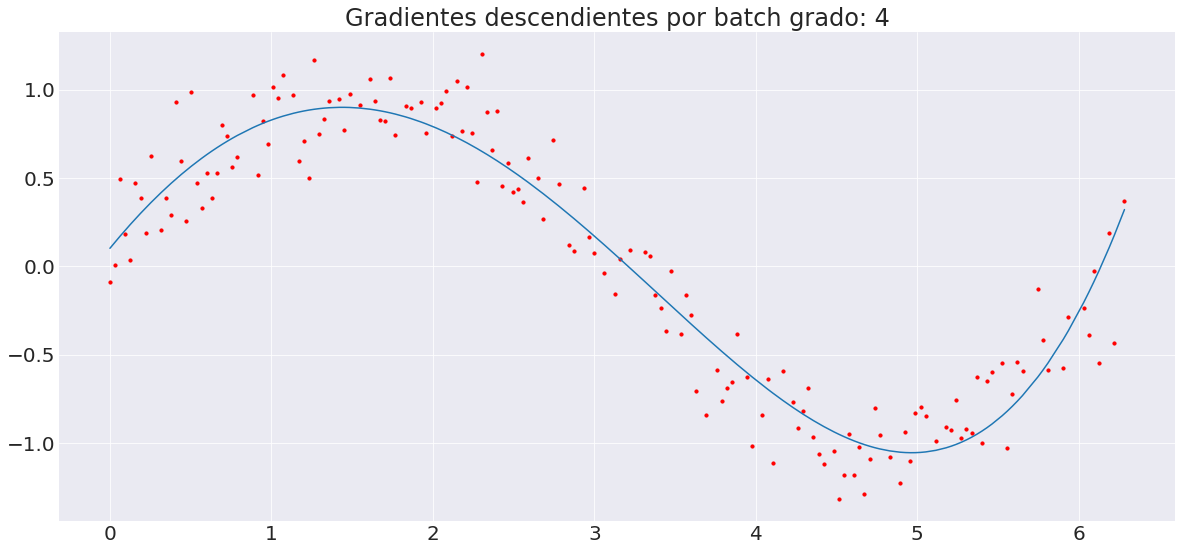

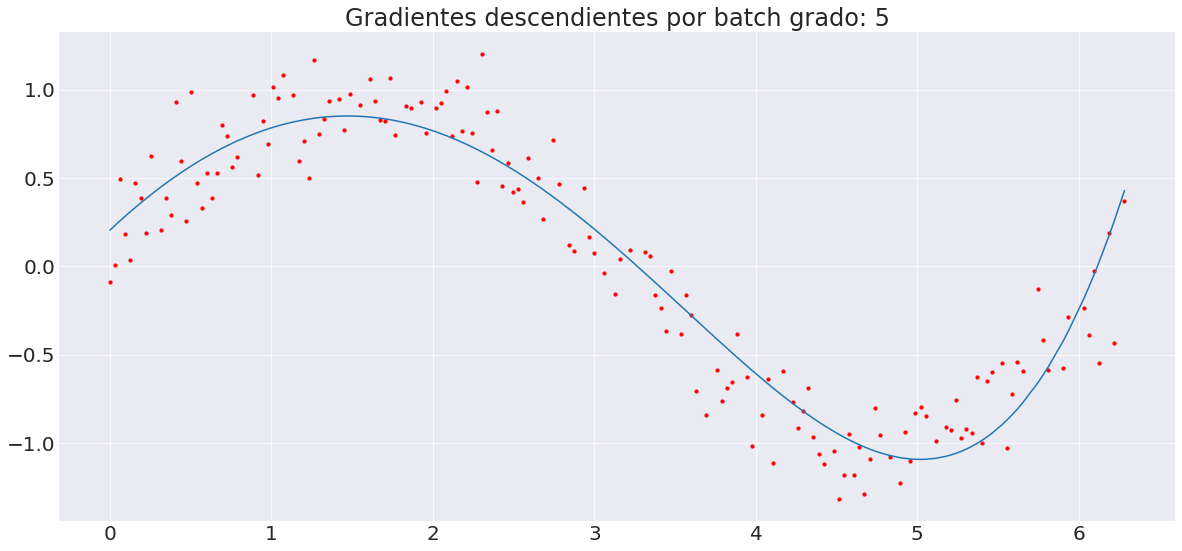

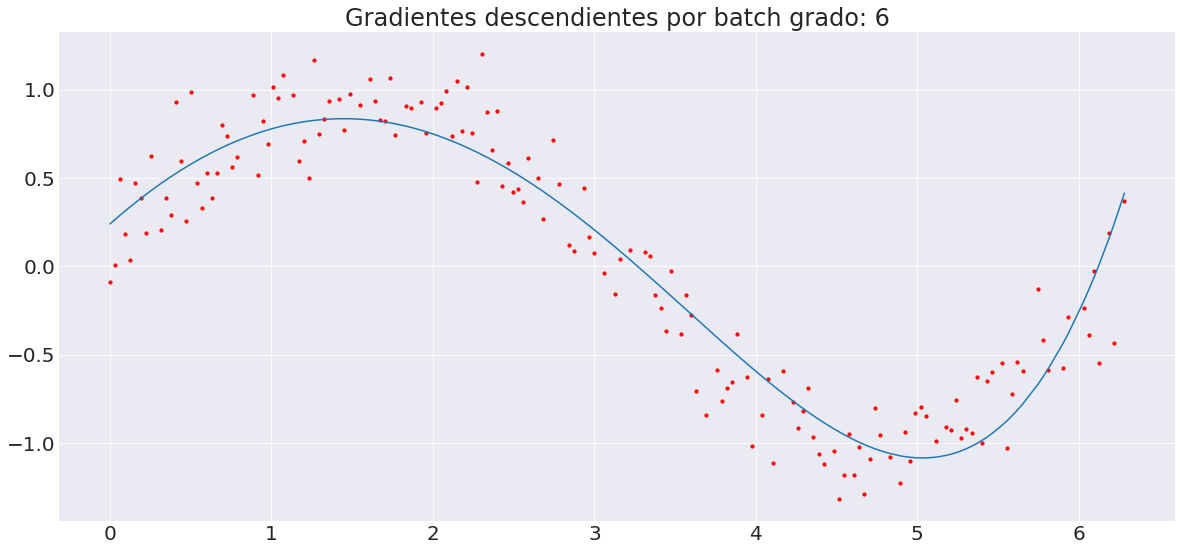

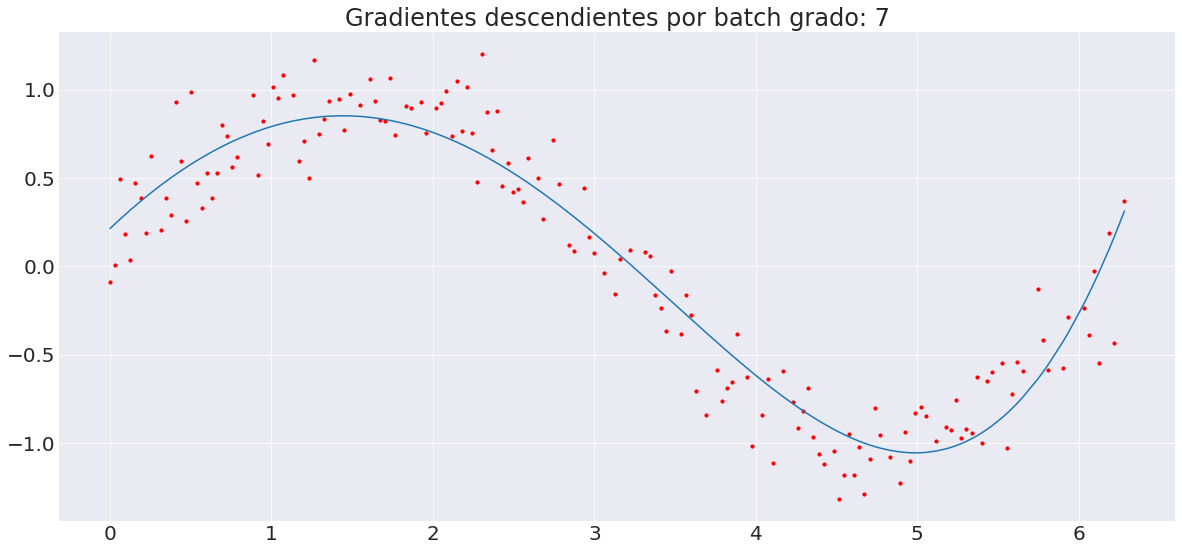

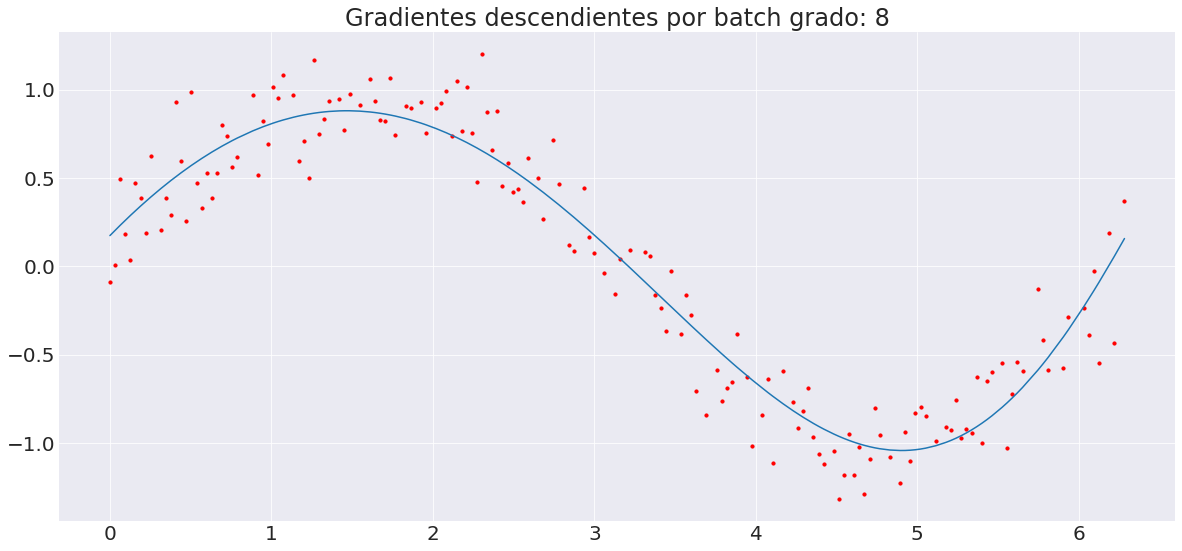

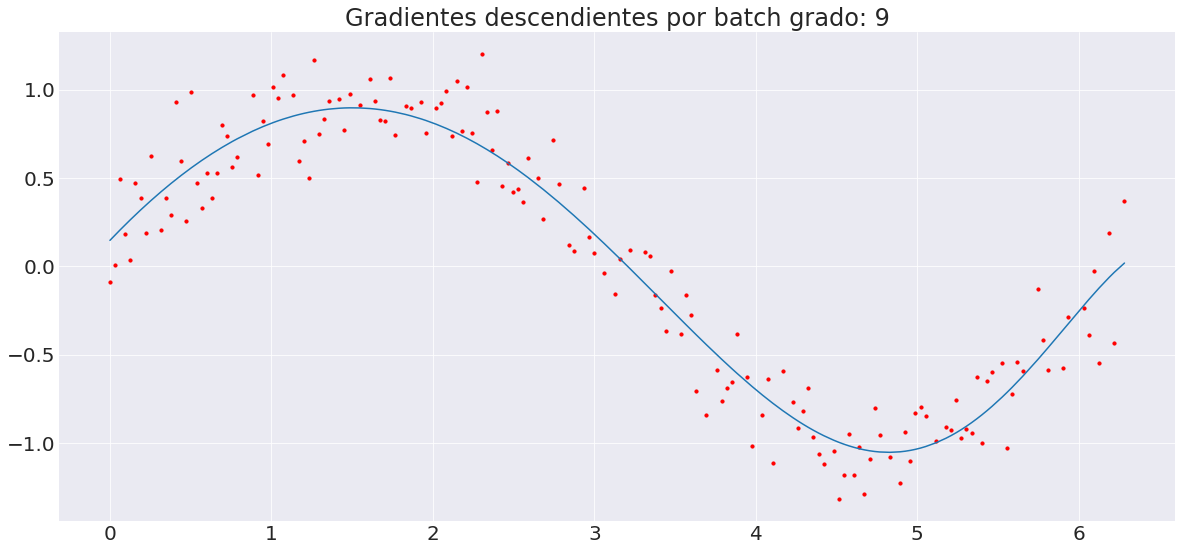

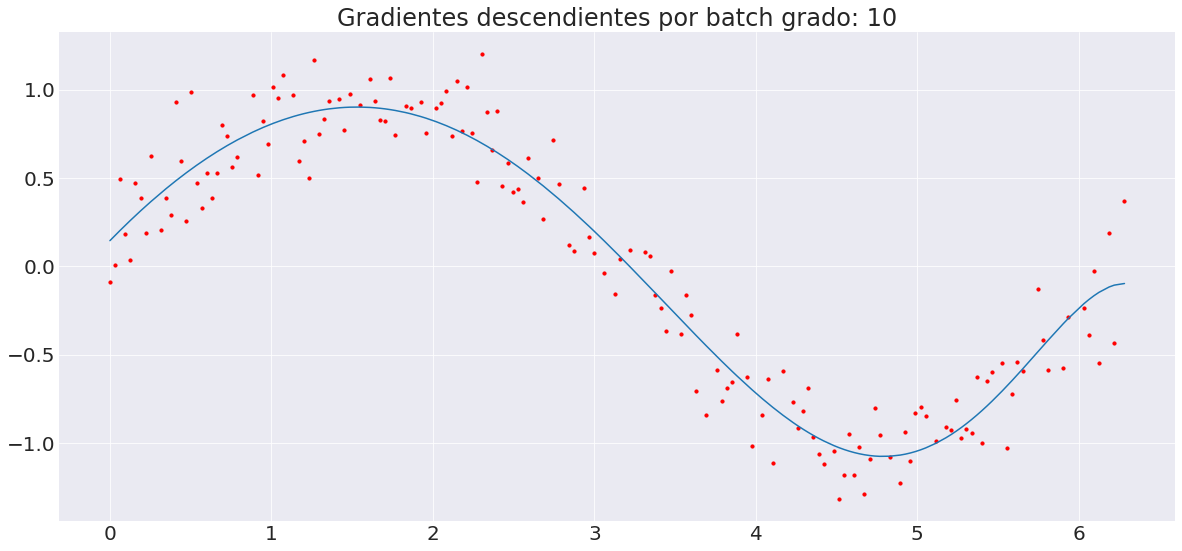

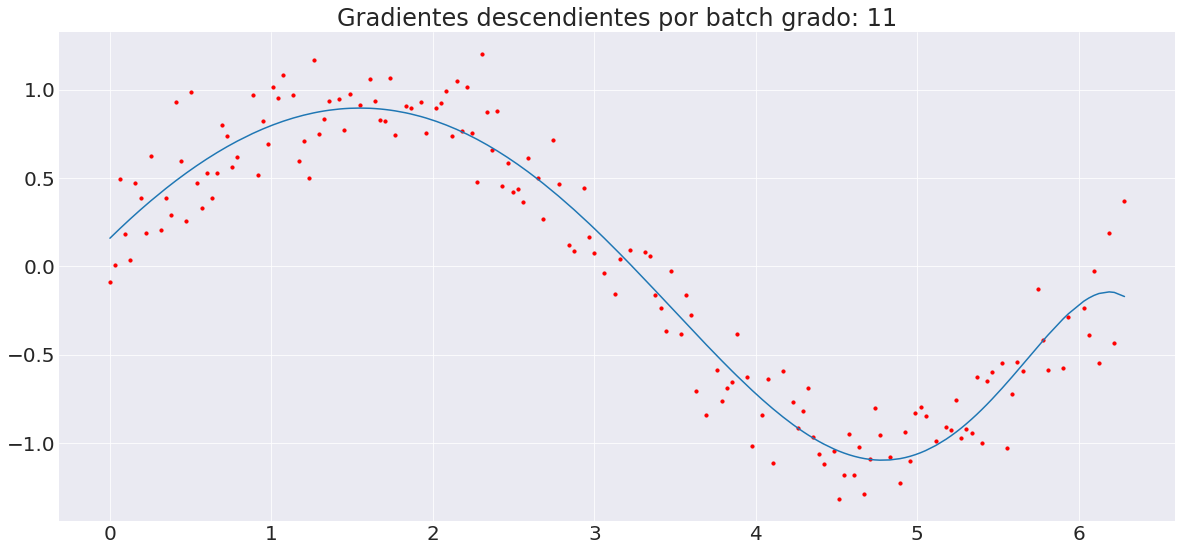

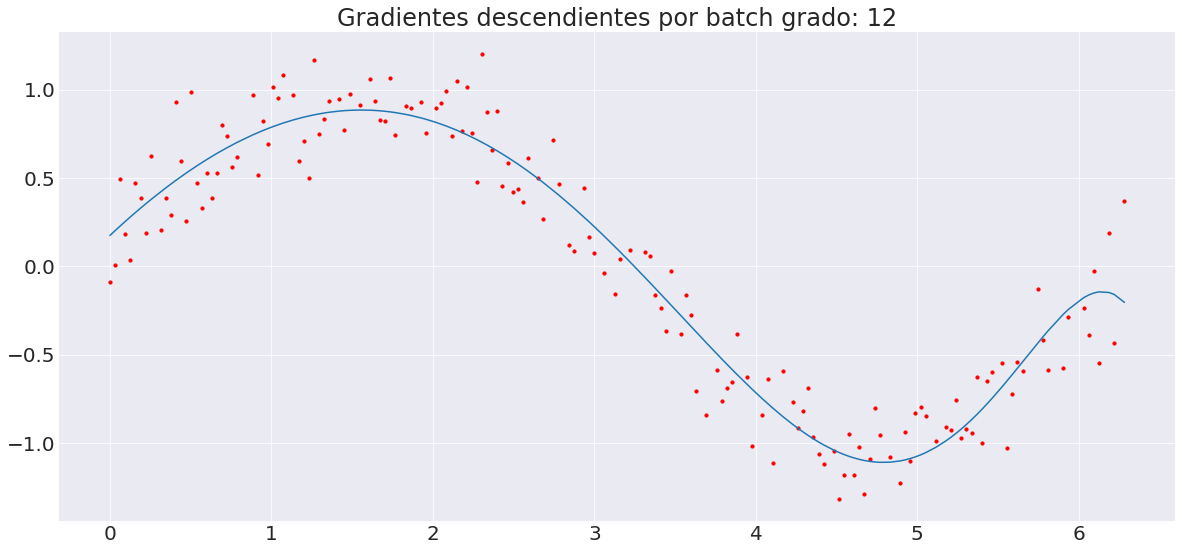

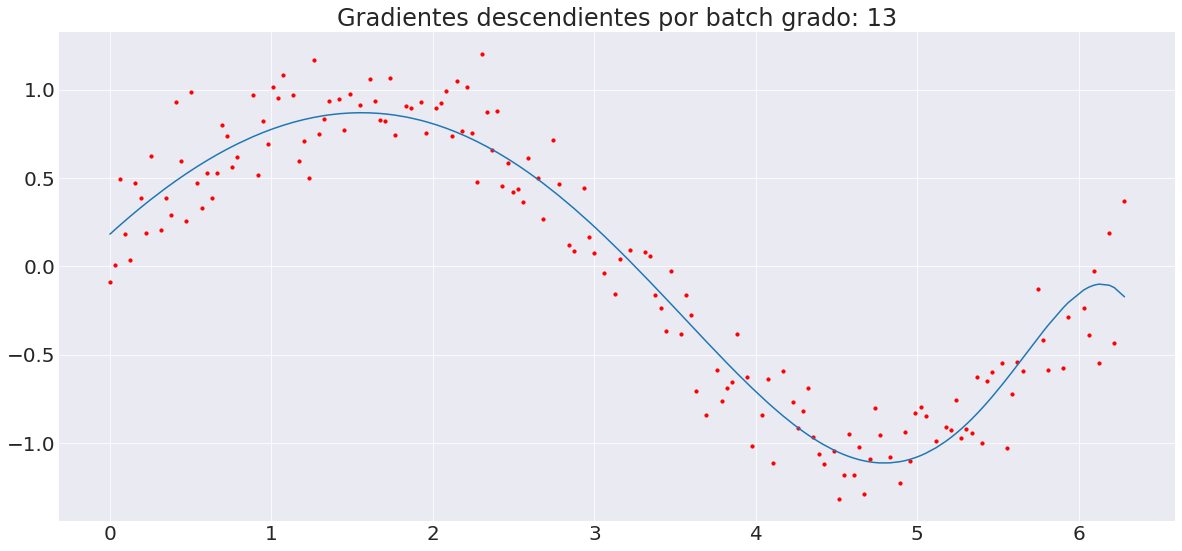

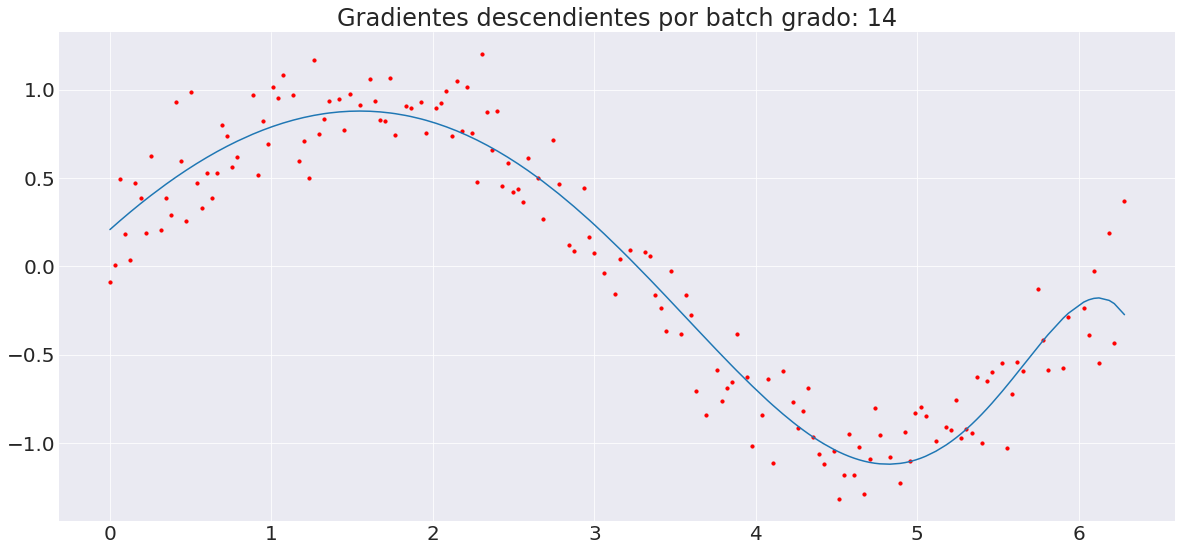

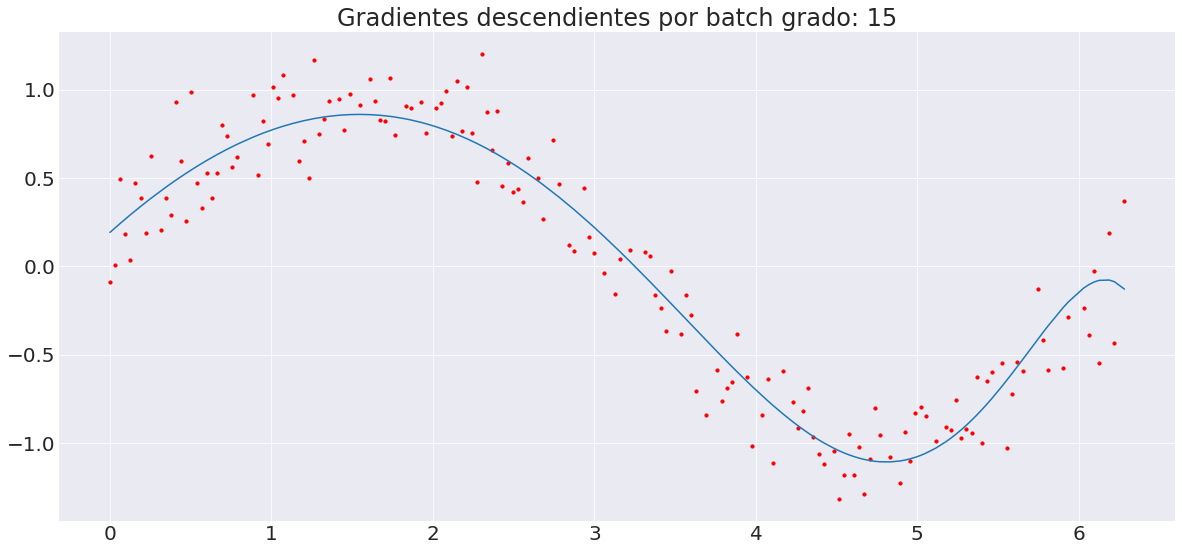

In [17]:
for i in range(1,16):
    model = BatchGradientDescent()
    x_aux=create_poly(x_train,i)
    scaler = StandardScaler()
    x_scale=scaler.fit_transform(x_aux)
    model.fit(x_scale,y_train, lr=0.01, epochs=10000,b=5)
    y_train_predicted=model.predict(x_scale)
    plt.figure()
    plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
    plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
    plt.title('Gradientes descendientes por batch grado: {}'.format(i))

## Punto 4

Realizaremos el cross validation unicamente para el modelo lineal afín

In [18]:
def k_folds(x, y, k=10):
    
    chunk_size = round(x.shape[0] / k)
    mse = []
    permidx=np.random.permutation(x.shape[0])
    for i in range(0, x.shape[0], chunk_size):
        end = i + chunk_size if i + chunk_size <= x.shape[0] else x.shape[0]
        x_valid = x[permidx[i: end]]
        y_valid = x[permidx[i: end]]
        x_train = np.concatenate([x[permidx[: i]], x[permidx[end:]]])
        y_train = np.concatenate([y[permidx[: i]], y[permidx[end:]]])

        model = AffineLinearRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_train)
        mse.append(np.sum(np.power(y_train-prediction,2)))

    mean_MSE = np.mean(mse)

    return mean_MSE

MSE Polinomio grado 1: 26.321314207078714
MSE Polinomio grado 2: 26.381964249112183
MSE Polinomio grado 3: 4.718300504105693
MSE Polinomio grado 4: 4.614345505681029
MSE Polinomio grado 5: 4.007721364756405
MSE Polinomio grado 6: 3.9366311980145205
MSE Polinomio grado 7: 3.925797125884886
MSE Polinomio grado 8: 3.884776271692351
MSE Polinomio grado 9: 3.8316596216322845
MSE Polinomio grado 10: 3.7738493075409694
MSE Polinomio grado 11: 3.7638428123551115
MSE Polinomio grado 12: 7.7945596426580215
MSE Polinomio grado 13: 15.501855840745808
MSE Polinomio grado 14: 11.589764096832042
MSE Polinomio grado 15: 56.30765863374152


Text(0.5, 1.0, 'MSE Regresión afin vs grado polinomio')

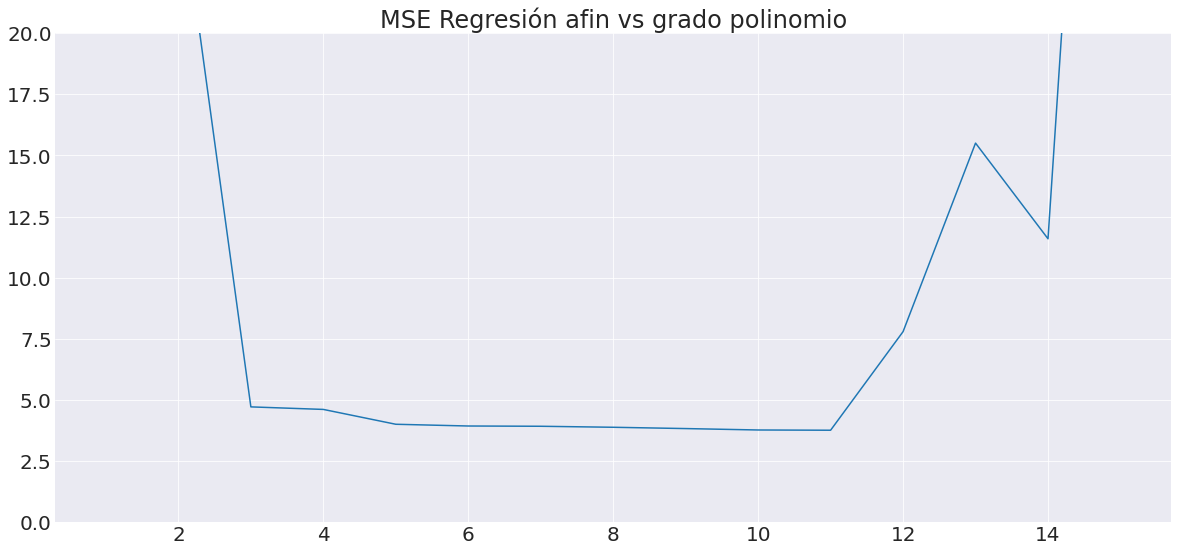

In [19]:
mse=[]
for i in range(1,16):
    x_aux=create_poly(x_train,i)
    mse.append(k_folds(x_aux,y_train,4))
    print("MSE Polinomio grado {}".format(i)+": {}".format(mse[i-1]))
plt.figure()
plt.plot(range(1,16),mse)
plt.ylim([0, 20])
plt.title('MSE Regresión afin vs grado polinomio')

Observamos que a partir del grado 3 las mejoras de error son muy bajas. También, al aumentar la complejidad, el algoritmo comienza a hacer overfitting incrementando en gran medida el error.

## Punto 5

Seleccionaremos el modelo de grado 3

## Punto 6

Utilizaremos solamente regularización Ridga ya que su forma matemática es mas simple de calcular

In [20]:
# Creamos función para obtener el fit para regresión lineal afín con regularización RIDGE
class RidgeRegression:
    """
    Modelo de aproximación con regresión afín a la lineal
    """
    _W=None
    
    def __init__(self):
        pass
    
    def fit(self, x, y, alpha=0.1):
        """
        Función de ajuste de W
        
        Args:
            x (numpy array): array de valores de entrada
            y (numpy array): array de valores de salida

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=y[:,np.newaxis]
        self._W= np.linalg.inv(np.transpose(x)@x + alpha * np.identity(x.shape[1]))@np.transpose(x)@y

        return
    
    def predict(self,x):
        """
        Función de predicción
        
        Args:
            x (numpy array): array de valores de entrada
            
        Returns
            numpy array: array de predicciones

        """
        if len(x.shape)<2:
            x=x[:,np.newaxis]
        x=np.append(x, np.ones(shape=(x.shape[0],1)), axis = 1)
        y=np.transpose(self._W)@np.transpose(x)
        return y[0,:]

Text(0.5, 1.0, 'Aproximación lineal grado: 3')

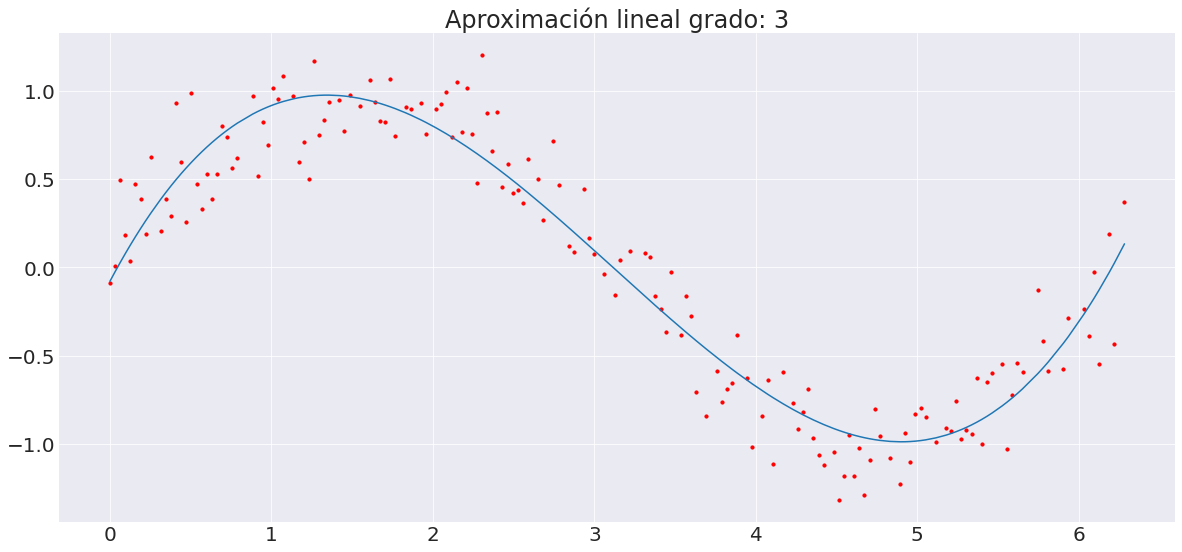

In [21]:
# Calculamos para grado 3
model = RidgeRegression()
x_aux=create_poly(x_train,3)
model.fit(x_aux,y_train)
y_train_predicted=model.predict(x_aux)
plt.figure()
plt.scatter(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)],s=10, color='red')
plt.plot(x_train[np.argsort(x_train)],y_train_predicted[np.argsort(x_train)])
plt.title('Aproximación lineal grado: {}'.format(3))

In [22]:
# Calculamos nuevamente el MSE para grado 3 y distintos alpha de regularización de K-folds
def ridge_folds(x, y, k, alpha):
    
    chunk_size = round(x.shape[0] / k)
    mse = []
    permidx=np.random.permutation(x.shape[0])
    for i in range(0, x.shape[0], chunk_size):
        end = i + chunk_size if i + chunk_size <= x.shape[0] else x.shape[0]
        x_valid = x[permidx[i: end]]
        y_valid = x[permidx[i: end]]
        x_train = np.concatenate([x[permidx[: i]], x[permidx[end:]]])
        y_train = np.concatenate([y[permidx[: i]], y[permidx[end:]]])

        model = RidgeRegression()
        model.fit(x_train, y_train, alpha)
        prediction = model.predict(x_train)
        mse.append(np.sum(np.power(y_train-prediction,2)))

    mean_MSE = np.mean(mse)

    return mean_MSE

MSE Polinomio grado 3 regularización Ridge alpha 10: 11.327528278385197
MSE Polinomio grado 3 regularización Ridge alpha 5: 8.620193292276111
MSE Polinomio grado 3 regularización Ridge alpha 1: 5.37176340679536
MSE Polinomio grado 3 regularización Ridge alpha 0.5: 4.943472742855571
MSE Polinomio grado 3 regularización Ridge alpha 0.1: 4.798122664628313
MSE Polinomio grado 3 regularización Ridge alpha 0.05: 4.78412339418459
MSE Polinomio grado 3 regularización Ridge alpha 0.01: 4.783763354140989
MSE Polinomio grado 3 regularización Ridge alpha 0.005: 4.8108137293475055
MSE Polinomio grado 3 regularización Ridge alpha 0.001: 4.765079777004958


Text(0.5, 1.0, 'MSE Regresión afin con regularización Ridge vs coeficiente de regularización')

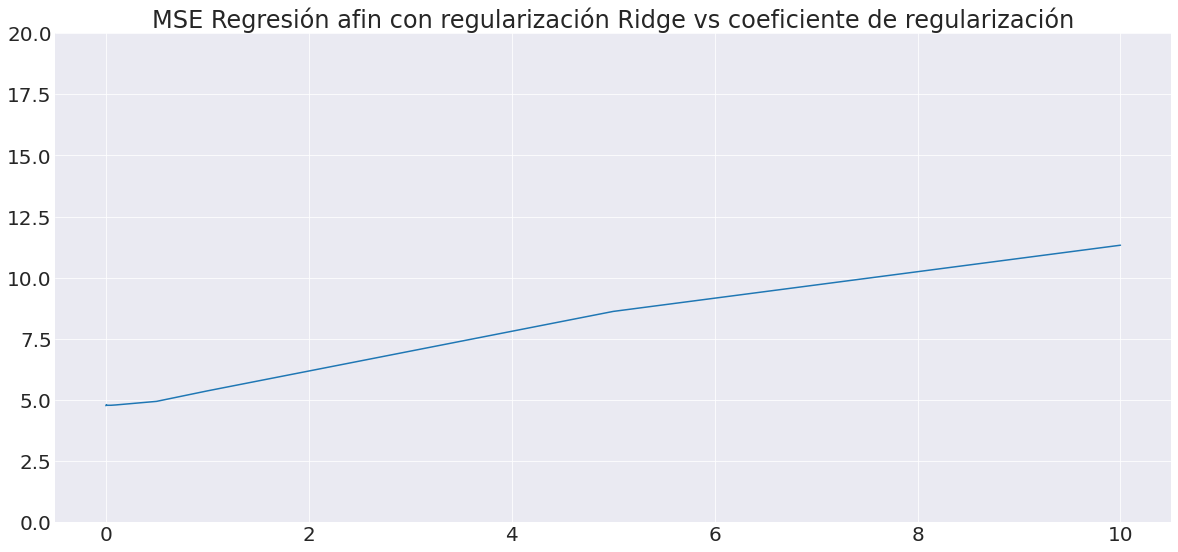

In [23]:
alpha=[10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
mse=[]
x_aux=create_poly(x_train,3)
for i in range(0,len(alpha)):
    mse.append(ridge_folds(x_aux,y_train,4,alpha[i]))
    print("MSE Polinomio grado 3 regularización Ridge alpha {}".format(alpha[i])+": {}".format(mse[i]))
plt.figure()
plt.plot(alpha,mse)
plt.ylim([0, 20])
plt.title('MSE Regresión afin con regularización Ridge vs coeficiente de regularización')

En este caso la regularización no crea una mejora sustancial en el MSE ya que previamente se había seleccionado un grado de polinomio cuya complejidad era suficiente para explicar el dataset (no se produce overfitting)